# Dissertation Images and Calculations

In [1]:
%pylab inline
import scipy
StartTime = datetime.datetime.now()

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.interpolate import interp1d
from scipy.special import eval_legendre
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandasql import sqldf
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [3]:
# The most common set of integration points
quadpoints = '["75 40 40 40 40 25 25 25", "75 40 40 40 40 25 25 25", "100 65 45 65 45 45 45 45", "115 65 45 65 60 45 45 45", "100 65 45 65 45 45 45 45"]'

# For differential cross sections
Ntheta = 15

In [4]:
def pysqldf(q):
    return sqldf(q, globals())

In [5]:
newsteelblue = '#397BB2'
newcoral = '#FF9670'
#singletcolor = 'steelblue'
#tripletcolor = 'coral'
#combinedcolor = '#99CC66'
singletcolor = newsteelblue
tripletcolor = newcoral
combinedcolor = '#52423A'

#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rcParams['text.latex.preamble'] = [r'\boldmath']  # Set for bold LaTeX symbols

params = {'backend': 'ps',
          'axes.facecolor': 'white',
          'axes.labelsize': 19,
          'axes.labelcolor': 'black',
          'axes.edgecolor': '#bcbcbc',
          'axes.unicode_minus': False,
          'figure.figsize': [12, 8],
          #'figure.figsize': [10, 6.7],
          #'font.family': 'sans-serif',
          'font.size': 18,
          'font.family': 'serif',
          'font.serif': ['Palatino'],
          'grid.color': '#555555',
          'legend.fontsize': 14,
          'lines.linewidth': 1.5,
          'legend.loc': 'best',
          'legend.numpoints': 1,
          'legend.fancybox': True,
          'legend.shadow': True,
          'text.usetex': True,
          'xtick.color': 'black',
          'xtick.labelsize': 18,
          'xtick.major.pad': 6,
          'ytick.color': 'black',
          'ytick.labelsize': 18,
          'ytick.major.pad': 6,
         }
pylab.rcParams.update(params)

dashstyle1 = [7, 1, 3, 1]  # 7 points on, 1 point off, 3 points on, 1 point off
dashstyle2 = [7, 1, 1, 1]  # 7 points on, 1 point off, 1 points on, 1 point off


def FixPlot(p):
    ax = p.gca()
    ax.xaxis.set_minor_locator(MultipleLocator( (p.xticks()[0][1]-p.xticks()[0][0]) / 2.0 ))
    ax.yaxis.set_minor_locator(MultipleLocator( (p.yticks()[0][1]-p.yticks()[0][0]) / 2.0 ))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    p.grid(b=True, which='major', color='#999999', linestyle=':')
    p.grid(b=True, which='minor', color='#eeeeee', linestyle=':')
    ax.set_axisbelow(True)

## Connecting to Database and Getting Entries

In [6]:
n1S = 1505  # S-wave singlet
n1P = 1000  # P-wave singlet
n1D1 = 916  # D-wave singlet
n1D2 = 913  # D-wave singlet
n1F1 = 385  # F-wave singlet
n1F2 = 462  # F-wave singlet
n1F = 462   # F-wave singlet (original set)
n1G1 = 462   # G-wave singlet
n1G2 = 462   # G-wave singlet
n1H1 = 462   # H-wave singlet
n1H2 = 462   # H-wave singlet

n3S = 1633  # S-wave triplet
n3P = 1000  # P-wave triplet
n3D1 = 919  # D-wave triplet
n3D2 = 913  # D-wave triplet
n3F1 = 385  # F-wave triplet
n3F2 = 462  # F-wave triplet
n3F = 462   # F-wave triplet (original set)
n3G1 = 462   # G-wave triplet
n3G2 = 462   # G-wave triplet
n3H1 = 462   # H-wave triplet
n3H2 = 462   # H-wave triplet

kohnmethod = "smatrix"  # The Kohn method that we are plotting

In [7]:
%run "Database Functions.py"

In [8]:
# Choose all entries for each of the partial waves
#  Singlet entries
entries1S = GetKappaTablenames(cursor, "lvalue=0 AND istriplet=0 AND mu=0.9 AND alpha=0.586 AND beta=0.58 AND gamma=1.093 AND omega=7 AND resorted=FALSE AND numterms=1505", quadpoints, 0, 0.866)
entries1P = GetKappaTablenames(cursor, "lvalue=1 AND istriplet=0 AND mu=0.9 AND alpha=0.397 AND beta=0.376 AND gamma=0.962 AND omega=7 AND resorted=FALSE", quadpoints, 0, 0.866)
entries1D1 = GetKappaTablenames(cursor, "lvalue=2 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=6 AND resorted=FALSE", quadpoints, 0, 0.866)
entries1D2 = GetKappaTablenames(cursor, "lvalue=2 AND istriplet=0 AND mu=0.7 AND alpha=0.6 AND beta=0.368 AND gamma=0.976 AND omega=6 AND resorted=FALSE AND numterms>=913", quadpoints, 0, 0.866)
entries1F1 = GetKappaTablenames(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=385", quadpoints, 0, 0.866)
entries1F2 = GetKappaTablenames(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", quadpoints, 0, 0.866)
entries1FFull = GetKappaTablenames(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", quadpoints, 0, 10)
entries1G1 = GetKappaTablenames(cursor, "lvalue=4 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=462 AND shielding=9", quadpoints, 0, 0.866)
entries1G2 = GetKappaTablenames(cursor, "lvalue=4 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", quadpoints, 0, 0.866)
entries1H1 = GetKappaTablenames(cursor, "lvalue=5 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)
entries1H2 = GetKappaTablenames(cursor, "lvalue=5 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", quadpoints, 0, 0.866)
#  Triplet entries
entries3S = GetKappaTablenames(cursor, "lvalue=0 AND istriplet=1 AND mu=0.9 AND alpha=0.323 AND beta=0.334 AND gamma=0.975 AND omega=7 AND resorted=FALSE", quadpoints, 0, 0.866)
entries3P = GetKappaTablenames(cursor, "lvalue=1 AND istriplet=1 AND mu=0.9 AND alpha=0.310 AND beta=0.311 AND gamma=0.995 AND omega=7 AND resorted=FALSE", quadpoints, 0, 0.866)
entries3D1 = GetKappaTablenames(cursor, "lvalue=2 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=6 AND resorted=FALSE", quadpoints, 0, 0.866)
entries3D2 = GetKappaTablenames(cursor, "lvalue=2 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=6 AND resorted=FALSE AND numterms>=913", quadpoints, 0, 0.866)
entries3F1 = GetKappaTablenames(cursor, "lvalue=3 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=385", quadpoints, 0, 0.866)
entries3F2 = GetKappaTablenames(cursor, "lvalue=3 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)
entries3G1 = GetKappaTablenames(cursor, "lvalue=4 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462 AND shielding=9", quadpoints, 0, 0.866)
entries3G2 = GetKappaTablenames(cursor, "lvalue=4 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)
entries3H1 = GetKappaTablenames(cursor, "lvalue=5 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)
entries3H2 = GetKappaTablenames(cursor, "lvalue=5 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", quadpoints, 0, 0.866)

# Now do the same for the SLS matrix elements
#@TODO: Combine with the above?
# Singlet entries
sls1S, cross_sls1S = GetSLS(cursor, "lvalue=0 AND istriplet=0 AND mu=0.9 AND alpha=0.586 AND beta=0.58 AND gamma=1.093 AND omega=7 AND resorted=FALSE AND numterms=1505", 0, quadpoints, 0, 0.866)
sls1P, cross_sls1P = GetSLS(cursor, "lvalue=1 AND istriplet=0 AND mu=0.9 AND alpha=0.397 AND beta=0.376 AND gamma=0.962 AND omega=7 AND resorted=FALSE", 1, quadpoints, 0, 0.866)
sls1D1, cross_sls1D1 = GetSLS(cursor, "lvalue=2 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=6 AND resorted=FALSE", 2, quadpoints, 0, 0.866)
sls1D2, cross_sls1D2 = GetSLS(cursor, "lvalue=2 AND istriplet=0 AND mu=0.7 AND alpha=0.6 AND beta=0.368 AND gamma=0.976 AND omega=6 AND resorted=FALSE AND numterms>=913", 2, quadpoints, 0, 0.866)
sls1F1, cross_sls1F1 = GetSLS(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=385", 3, quadpoints, 0, 0.866)
sls1F2, cross_sls1F2 = GetSLS(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", 3, quadpoints, 0, 0.866)
sls1FFull, cross_sls1FFull = GetSLS(cursor, "lvalue=3 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", 3, quadpoints, 0, 10)
sls1G1, cross_sls1G1 = GetSLS(cursor, "lvalue=4 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=462 AND shielding=9", 3, quadpoints, 0, 0.866)
sls1G2, cross_sls1G2 = GetSLS(cursor, "lvalue=4 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", 3, quadpoints, 0, 0.866)
sls1H1, cross_sls1H1 = GetSLS(cursor, "lvalue=5 AND istriplet=0 AND mu=0.7 AND alpha=0.359 AND beta=0.368 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)
sls1H2, cross_sls1H2 = GetSLS(cursor, "lvalue=5 AND istriplet=0 AND mu=0.7 AND alpha=0.5 AND beta=0.6 AND gamma=1.1 AND numterms=462", 3, quadpoints, 0, 0.866)
#  Triplet entries
sls3S, cross_sls3S = GetSLS(cursor, "lvalue=0 AND istriplet=1 AND mu=0.9 AND alpha=0.323 AND beta=0.334 AND gamma=0.975 AND omega=7 AND resorted=FALSE", 1, quadpoints, 0, 0.866)
sls3P, cross_sls3P = GetSLS(cursor, "lvalue=1 AND istriplet=1 AND mu=0.9 AND alpha=0.310 AND beta=0.311 AND gamma=0.995 AND omega=7 AND resorted=FALSE", 1, quadpoints, 0, 0.866)
sls3D1, cross_sls3D1 = GetSLS(cursor, "lvalue=2 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=6 AND resorted=FALSE", 2, quadpoints, 0, 0.866)
sls3D2, cross_sls3D2 = GetSLS(cursor, "lvalue=2 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=6 AND resorted=FALSE AND numterms>=913", 2, quadpoints, 0, 0.866)
sls3F1, cross_sls3F1 = GetSLS(cursor, "lvalue=3 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=385", 3, quadpoints, 0, 0.866)
sls3F2, cross_sls3F2 = GetSLS(cursor, "lvalue=3 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)
sls3G1, cross_sls3G1 = GetSLS(cursor, "lvalue=4 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462 AND shielding=9", 3, quadpoints, 0, 0.866)
sls3G2, cross_sls3G2 = GetSLS(cursor, "lvalue=4 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)
sls3H1, cross_sls3H1 = GetSLS(cursor, "lvalue=5 AND istriplet=1 AND mu=0.7 AND alpha=0.356 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)
sls3H2, cross_sls3H2 = GetSLS(cursor, "lvalue=5 AND istriplet=1 AND mu=0.7 AND alpha=0.6 AND beta=0.365 AND gamma=0.976 AND omega=5 AND numterms=462", 3, quadpoints, 0, 0.866)

In [9]:
# Obtains the phase shifts at the desired number of terms for each partial wave
#  Singlet
print "Loading singlet phase shifts"
kappa1S, E1S, phase1S, cross1S = GetPhaseShifts(cursor, entries1S, n1S, 0, kohnmethod)
kappa1P, E1P, phase1P, cross1P = GetPhaseShifts(cursor, entries1P, n1P, 1, kohnmethod)
kappa1D1, E1D1, phase1D1, cross1D1 = GetPhaseShifts(cursor, entries1D1, n1D1, 2, kohnmethod)
kappa1D2, E1D2, phase1D2, cross1D2 = GetPhaseShifts(cursor, entries1D2, n1D2, 2, kohnmethod)
print "Halfway through loading singlet phase shifts"
kappa1F1, E1F1, phase1F1, cross1F1 = GetPhaseShifts(cursor, entries1F1, n1F1, 3, kohnmethod)
kappa1F2, E1F2, phase1F2, cross1F2 = GetPhaseShifts(cursor, entries1F2, n1F2, 3, kohnmethod)
kappa1G1, E1G1, phase1G1, cross1G1 = GetPhaseShifts(cursor, entries1G1, n1G1, 4, "tmatrix")
kappa1G2, E1G2, phase1G2, cross1G2 = GetPhaseShifts(cursor, entries1G2, n1G2, 4, kohnmethod)
kappa1H1, E1H1, phase1H1, cross1H1 = GetPhaseShifts(cursor, entries1H1, n1H1, 5, "tmatrix")
kappa1H2, E1H2, phase1H2, cross1H2 = GetPhaseShifts(cursor, entries1H2, n1H2, 5, kohnmethod)
kappa1FFull, E1FFull, phase1FFull, cross1FFull = GetPhaseShifts(cursor, entries1FFull, n1F, 3, kohnmethod)
print "Loading triplet phase shifts"
#  Triplet
kappa3S, E3S, phase3S, cross3S = GetPhaseShifts(cursor, entries3S, n3S, 0, kohnmethod)
kappa3P, E3P, phase3P, cross3P = GetPhaseShifts(cursor, entries3P, n3P, 1, kohnmethod)
kappa3D1, E3D1, phase3D1, cross3D1 = GetPhaseShifts(cursor, entries3D1, n3D1, 2, kohnmethod)
kappa3D2, E3D2, phase3D2, cross3D2 = GetPhaseShifts(cursor, entries3D2, n3D2, 2, kohnmethod)
print "Halfway through loading triplet phase shifts"
kappa3F1, E3F1, phase3F1, cross3F1 = GetPhaseShifts(cursor, entries3F1, n3F1, 3, kohnmethod)
kappa3F2, E3F2, phase3F2, cross3F2 = GetPhaseShifts(cursor, entries3F2, n3F2, 3, kohnmethod)
kappa3G1, E3G1, phase3G1, cross3G1 = GetPhaseShifts(cursor, entries3G1, n3G1, 4, "tmatrix")
kappa3G2, E3G2, phase3G2, cross3G2 = GetPhaseShifts(cursor, entries3G2, n3G2, 4, kohnmethod)
kappa3H1, E3H1, phase3H1, cross3H1 = GetPhaseShifts(cursor, entries3H1, n3H1, 5, "tmatrix")
kappa3H2, E3H2, phase3H2, cross3H2 = GetPhaseShifts(cursor, entries3H2, n3H2, 5, kohnmethod)
#kappa3FFull, E3FFull, phase3FFull, cross3FFull = GetPhaseShifts(cursor, entries3FFull, n3F, 3, kohnmethod)

Loading singlet phase shifts
Halfway through loading singlet phase shifts
Loading triplet phase shifts
Halfway through loading triplet phase shifts


In [10]:
# D-wave
# Singlet
kappa1D = np.concatenate((kappa1D1[kappa1D1<0.3],kappa1D2[kappa1D2>=0.3]))
E1D = np.concatenate((E1D1[kappa1D1<0.3],E1D2[kappa1D2>=0.3]))
phase1D = np.concatenate((phase1D1[kappa1D1<0.3],phase1D2[kappa1D2>=0.3]))
cross1D = np.concatenate((cross1D1[kappa1D1<0.3],cross1D2[kappa1D2>=0.3]))
sls1D = np.concatenate((sls1D1[kappa1D1<0.3],sls1D2[kappa1D2>=0.3]))
# Triplet
kappa3D = np.concatenate((kappa3D1[kappa3D1<0.3],kappa3D2[kappa3D2>=0.3]))
E3D = np.concatenate((E3D1[kappa3D1<0.3],E3D2[kappa3D2>=0.3]))
phase3D = np.concatenate((phase3D1[kappa3D1<0.3],phase3D2[kappa3D2>=0.3]))
cross3D = np.concatenate((cross3D1[kappa3D1<0.3],cross3D2[kappa3D2>=0.3]))
sls3D = np.concatenate((sls3D1[kappa3D1<0.3],sls3D2[kappa3D2>=0.3]))

# F-wave
# Singlet
kappa1F = np.concatenate((kappa1F1[kappa1F1<0.4],kappa1F2[kappa1F2>=0.4]))
E1F = np.concatenate((E1F1[kappa1F1<0.4],E1F2[kappa1F2>=0.4]))
phase1F = np.concatenate((phase1F1[kappa1F1<0.4],phase1F2[kappa1F2>=0.4]))
cross1F = np.concatenate((cross1F1[kappa1F1<0.4],cross1F2[kappa1F2>=0.4]))
sls1F = np.concatenate((sls1F1[kappa1F1<0.4],sls1F2[kappa1F2>=0.4]))
# Triplet
kappa3F = np.concatenate((kappa3F1[kappa3F1<0.4],kappa3F2[kappa3F2>=0.4]))
E3F = np.concatenate((E3F1[kappa3F1<0.4],E3F2[kappa3F2>=0.4]))
phase3F = np.concatenate((phase3F1[kappa3F1<0.4],phase3F2[kappa3F2>=0.4]))
cross3F = np.concatenate((cross3F1[kappa3F1<0.4],cross3F2[kappa3F2>=0.4]))
sls3F = np.concatenate((sls3F1[kappa3F1<0.4],sls3F2[kappa3F2>=0.4]))

# G-wave
# Singlet
kappa1G = np.concatenate((kappa1G1[kappa1G1<0.45],kappa1G2[kappa1G2>=0.45]))
E1G = np.concatenate((E1G1[kappa1G1<0.45],E1G2[kappa1G2>=0.45]))
phase1G = np.concatenate((phase1G1[kappa1G1<0.45],phase1G2[kappa1G2>=0.45]))
cross1G = np.concatenate((cross1G1[kappa1G1<0.45],cross1G2[kappa1G2>=0.45]))
sls1G = np.concatenate((sls1G1[kappa1G1<0.45],sls1G2[kappa1G2>=0.45]))
# Triplet
kappa3G = np.concatenate((kappa3G1[kappa3G1<0.45],kappa3G2[kappa3G2>=0.45]))
E3G = np.concatenate((E3G1[kappa3G1<0.45],E3G2[kappa3G2>=0.45]))
phase3G = np.concatenate((phase3G1[kappa3G1<0.45],phase3G2[kappa3G2>=0.45]))
cross3G = np.concatenate((cross3G1[kappa3G1<0.45],cross3G2[kappa3G2>=0.45]))
sls3G = np.concatenate((sls3G1[kappa3G1<0.45],sls3G2[kappa3G2>=0.45]))

# H-wave
# Singlet
kappa1H = np.concatenate((kappa1H1[kappa1H1<0.45],kappa1H2[kappa1H2>=0.45]))
E1H = np.concatenate((E1H1[kappa1H1<0.45],E1H2[kappa1H2>=0.45]))
phase1H = np.concatenate((phase1H1[kappa1H1<0.45],phase1H2[kappa1H2>=0.45]))
cross1H = np.concatenate((cross1H1[kappa1H1<0.45],cross1H2[kappa1H2>=0.45]))
sls1H = np.concatenate((sls1H1[kappa1H1<0.45],sls1H2[kappa1H2>=0.45]))
# Triplet
kappa3H = np.concatenate((kappa3H1[kappa3H1<0.45],kappa3H2[kappa3H2>=0.45]))
E3H = np.concatenate((E3H1[kappa3H1<0.45],E3H2[kappa3H2>=0.45]))
phase3H = np.concatenate((phase3H1[kappa3H1<0.45],phase3H2[kappa3H2>=0.45]))
cross3H = np.concatenate((cross3H1[kappa3H1<0.45],cross3H2[kappa3H2>=0.45]))
sls3H = np.concatenate((sls3H1[kappa3H1<0.45],sls3H2[kappa3H2>=0.45]))

For the higher partial waves, the very low $\kappa$ runs fail, because the phase shifts are very nearly 0.

In [11]:
def AddLowKappa(kappa, energy, phase, cross, sls=None):
    kappa = np.insert(kappa, 0, 0.0)
    energy = np.insert(energy, 0, 0.0)
    phase = np.insert(phase, 0, 0.0)
    cross = np.insert(cross, 0, 0.0)
    if sls == None:
        return [kappa, energy, phase, cross]
    sls = np.insert(sls, 0, 0.0)
    return [kappa, energy, phase, cross, sls]

# Do I even need to do anything with the return values? Does it return by reference or a copy?
kappa1P, E1P, phase1P, cross1P, sls1P = AddLowKappa(kappa1P, E1P, phase1P, cross1P, sls1P)
kappa1D, E1D, phase1D, cross1D, sls1D = AddLowKappa(kappa1D, E1D, phase1D, cross1D, sls1D)
kappa1F, E1F, phase1F, cross1F, sls1F = AddLowKappa(kappa1F, E1F, phase1F, cross1F, sls1F)
kappa1G, E1G, phase1G, cross1G, sls1G = AddLowKappa(kappa1G, E1G, phase1G, cross1G, sls1G)
kappa1H, E1H, phase1H, cross1H, sls1H = AddLowKappa(kappa1H, E1H, phase1H, cross1H, sls1H)
kappa3P, E3P, phase3P, cross3P, sls3P = AddLowKappa(kappa3P, E3P, phase3P, cross3P, sls3P)
kappa3D, E3D, phase3D, cross3D, sls3D = AddLowKappa(kappa3D, E3D, phase3D, cross3D, sls3D)
kappa3F, E3F, phase3F, cross3F, sls3F = AddLowKappa(kappa3F, E3F, phase3F, cross3F, sls3F)
kappa3G, E3G, phase3G, cross3G, sls3G = AddLowKappa(kappa3G, E3G, phase3G, cross3G, sls3G)
kappa3H, E3H, phase3H, cross3H, sls3H = AddLowKappa(kappa3H, E3H, phase3H, cross3H, sls3H)
kappa1FFull, E1FFull, phase1FFull, cross1FFull, sls1FFull = AddLowKappa(kappa1FFull, E1FFull, phase1FFull, cross1FFull, sls1FFull)

c:\Coding\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


Are there any that still are missing the $\kappa = 0.866$ runs?

In [12]:
def AddHighKappa(kappa, energy, phase, cross, sls=None):
    kappa = np.append(kappa, 0.866)
    energy = np.append(energy, 27.21138505/4.0*0.866**2)
    phase = np.append(phase, phase[np.size(phase)-1])  # Repeat last entry
    cross = np.append(cross, cross[np.size(cross)-1])
    if sls == None:
        return [kappa, energy, phase, cross]
    sls = np.append(sls, sls[np.size(sls)-1])
    return [kappa, energy, phase, cross, sls]

#kappa3D, E3D, phase3D, cross3D, sls3D = AddHighKappa(kappa3D, E3D, phase3D, cross3D, sls3D)
#kappa1F, E1F, phase1F, cross1F, sls1F = AddHighKappa(kappa1F, E1F, phase1F, cross1F, sls1F)

## Correct the phase shifts near resonances

The inverse trigonometric functions only return within a certain range, so we sometimes have to add or subtract $\pi$ near the resonances.

In [13]:
def swavebackground(E):
    return -1.18940-0.36829*E+0.033049*E**2
def pwavebackground(E):
    return 2.19180-0.52604*E+0.06307*E**2
def dwavebackground(E):
    return 1.683-0.7528*E+0.10604*E**2

swavebkgr = swavebackground(E1S)
pwavebkgr = pwavebackground(E1P)
dwavebkgr = dwavebackground(E1D)

In [14]:
def CorrectResonance(E, phase, backgroundfunc):
    """   """
    for i in range(np.size(phase)):
        if E[i] < 3.0:
            continue
        if phase[i] - backgroundfunc(E[i]) > pi/2:
            phase[i] = phase[i] - pi
        if phase[i] - backgroundfunc(E[i]) < -pi/2:
            phase[i] = phase[i] + pi
    return

E1Sorig = np.copy(E1S); phase1Sorig = np.copy(phase1S)
CorrectResonance(E1S, phase1S, swavebackground)
CorrectResonance(E1P, phase1P, pwavebackground)
CorrectResonance(E1D, phase1D, dwavebackground)

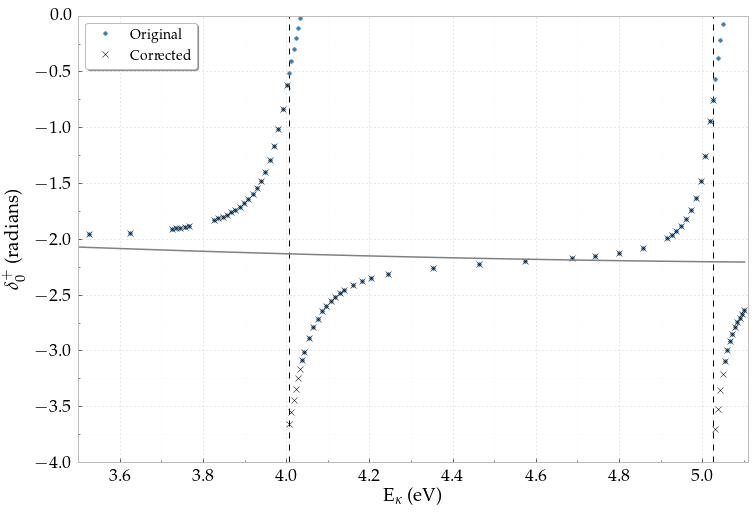

In [15]:
fig = pyplot.figure()
pyplot.axvline(x=4.00658, color='black', ls='dashed', lw=1)
pyplot.axvline(x=5.0272, color='black', ls='dashed', lw=1)
pyplot.plot(E1Sorig, phase1Sorig, '.', ms=7, label=r'Original', color=singletcolor)
pyplot.plot(E1S, phase1S, 'x', label=r'Corrected', color='k')
pyplot.plot(E1S, swavebkgr, '.', ms=0.01, ls='solid', color='gray')
#pyplot.plot(E1P, phase1P, '.', label=r'$^1P$ Complex Kohn', color=singletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_0^+$ (radians)")
pyplot.xlim([3.5,5.11])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("swave-phases-reson-pi.pdf", bbox_inches='tight')
pyplot.show()

## Helper Functions

In [16]:
def ktoE(kappa):
    return 27.21138505/4.0 * kappa**2

def Etok(E):
    return sqrt(E/27.21138505*4.0)

In [17]:
def PercentDiff(a, b):
    return abs((a-b)/(a+b)*2) * 100

## Converting to Pandas Dataframes

In [18]:
df1S = pd.DataFrame({'Kappa': kappa1S, 'E': E1S, 'Phase1S': phase1S, 'Cross1S': cross1S})
df1P = pd.DataFrame({'Kappa': kappa1P, 'E': E1P, 'Phase1P': phase1P, 'Cross1P': cross1P})
df1D = pd.DataFrame({'Kappa': kappa1D, 'E': E1D, 'Phase1D': phase1D, 'Cross1D': cross1D})
df1F = pd.DataFrame({'Kappa': kappa1F, 'E': E1F, 'Phase1F': phase1F, 'Cross1F': cross1F})
df1G = pd.DataFrame({'Kappa': kappa1G, 'E': E1G, 'Phase1G': phase1G, 'Cross1G': cross1G})
df1H = pd.DataFrame({'Kappa': kappa1H, 'E': E1H, 'Phase1H': phase1H, 'Cross1H': cross1H})
df3S = pd.DataFrame({'Kappa': kappa3S, 'E': E3S, 'Phase3S': phase3S, 'Cross3S': cross3S})
df3P = pd.DataFrame({'Kappa': kappa3P, 'E': E3P, 'Phase3P': phase3P, 'Cross3P': cross3P})
df3D = pd.DataFrame({'Kappa': kappa3D, 'E': E3D, 'Phase3D': phase3D, 'Cross3D': cross3D})
df3F = pd.DataFrame({'Kappa': kappa3F, 'E': E3F, 'Phase3F': phase3F, 'Cross3F': cross3F})
df3G = pd.DataFrame({'Kappa': kappa3G, 'E': E3G, 'Phase3G': phase3G, 'Cross3G': cross3G})
df3H = pd.DataFrame({'Kappa': kappa3H, 'E': E3H, 'Phase3H': phase3H, 'Cross3H': cross3H})

In [19]:
df = pd.merge(df1S, df1P, on=['Kappa','E'], how='outer')
df = pd.merge(df, df1D, on=['Kappa','E'], how='outer')
df = pd.merge(df, df1F, on=['Kappa','E'], how='outer')
df = pd.merge(df, df1G, on=['Kappa','E'], how='outer')
df = pd.merge(df, df1H, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3S, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3P, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3D, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3F, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3G, on=['Kappa','E'], how='outer')
df = pd.merge(df, df3H, on=['Kappa','E'], how='outer')
df = df.sort(['Kappa'], ascending=1)
df = df.drop_duplicates(subset='Kappa')
df.reset_index(inplace=True, drop=True)
df.set_index('Kappa', inplace=True, drop=False, append=False)  # Needed for the interpolation
df = df.interpolate(method='values')
df = df[df.Kappa != 0]  # Remove the first line with 0 energy
df.reset_index(inplace=True, drop=True) 
df[:3]
#df.describe()

,Cross1S,E,Kappa,Phase1S,Cross1P,Phase1P,Cross1D,Phase1D,Cross1F,Phase1F,...,Cross3P,Phase3P,Cross3D,Phase3D,Cross3F,Phase3F,Cross3G,Phase3G,Cross3H,Phase3H
0,75.016451,6.802846e-08,0.0001,-0.000433,4.452818e-09,8.614734e-09,3.736173e-10,9.664591e-09,1.735054e-11,2.489302e-09,...,6.840653e-11,-1.307732e-09,8.850449e-11,4.703841e-09,1.400220e-11,2.236244e-09,2.859855e-14,8.912936e-11,5.147058e-17,3.420213e-12
1,75.016435,2.721139e-07,0.0002,-0.000866,8.905637e-09,1.722947e-08,7.472345e-10,1.932918e-08,3.470108e-11,4.978603e-09,...,1.368131e-10,-2.615464e-09,1.770090e-10,9.407682e-09,2.800440e-11,4.472487e-09,5.719710e-14,1.782587e-10,1.029412e-16,6.840426e-12
2,75.016400,6.122562e-07,0.0003,-0.001299,1.335845e-08,2.584420e-08,1.120852e-09,2.899377e-08,5.205163e-11,7.467905e-09,...,2.052196e-10,-3.923196e-09,2.655135e-10,1.411152e-08,4.200660e-11,6.708731e-09,8.579566e-14,2.673881e-10,1.544117e-16,1.026064e-11


In [20]:
# The first few columns aren't in the desired order. We fix that here.
cols = df.columns.tolist()
cols[0] = 'Kappa'
cols[1] = 'E'
cols[2] = 'Cross1S'
#df = df.reindex(columns=cols, axis=1)
df = df.reindex(columns=cols)
df[:3]

,Kappa,E,Cross1S,Phase1S,Cross1P,Phase1P,Cross1D,Phase1D,Cross1F,Phase1F,...,Cross3P,Phase3P,Cross3D,Phase3D,Cross3F,Phase3F,Cross3G,Phase3G,Cross3H,Phase3H
0,0.0001,6.802846e-08,75.016451,-0.000433,4.452818e-09,8.614734e-09,3.736173e-10,9.664591e-09,1.735054e-11,2.489302e-09,...,6.840653e-11,-1.307732e-09,8.850449e-11,4.703841e-09,1.400220e-11,2.236244e-09,2.859855e-14,8.912936e-11,5.147058e-17,3.420213e-12
1,0.0002,2.721139e-07,75.016435,-0.000866,8.905637e-09,1.722947e-08,7.472345e-10,1.932918e-08,3.470108e-11,4.978603e-09,...,1.368131e-10,-2.615464e-09,1.770090e-10,9.407682e-09,2.800440e-11,4.472487e-09,5.719710e-14,1.782587e-10,1.029412e-16,6.840426e-12
2,0.0003,6.122562e-07,75.016400,-0.001299,1.335845e-08,2.584420e-08,1.120852e-09,2.899377e-08,5.205163e-11,7.467905e-09,...,2.052196e-10,-3.923196e-09,2.655135e-10,1.411152e-08,4.200660e-11,6.708731e-09,8.579566e-14,2.673881e-10,1.544117e-16,1.026064e-11


In [21]:
# This is the "tidy data" way. The previous method works great for getting the data to line up properly and interpolate.
#  Right now, I am not using this, as it makes some things more difficult (particularly the differential cross sections).

dftidy = [pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase1S'], 'L': 0, 'IsTriplet': False}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase1P'], 'L': 1, 'IsTriplet': False}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase1D'], 'L': 2, 'IsTriplet': False}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase1F'], 'L': 3, 'IsTriplet': False}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase1G'], 'L': 4, 'IsTriplet': False}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase1H'], 'L': 5, 'IsTriplet': False}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase3S'], 'L': 0, 'IsTriplet': True}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase3P'], 'L': 1, 'IsTriplet': True}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase3D'], 'L': 2, 'IsTriplet': True}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase3F'], 'L': 3, 'IsTriplet': True}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase3G'], 'L': 4, 'IsTriplet': True}),
         pd.DataFrame({'Kappa': df['Kappa'], 'Phase': df['Phase3H'], 'L': 5, 'IsTriplet': True})]
dftidy = pd.concat(dftidy)
dftidy.reset_index(inplace=True, drop=True)
dftidy[:3]

,IsTriplet,Kappa,L,Phase
0,False,0.0001,0,-0.000433
1,False,0.0002,0,-0.000866
2,False,0.0003,0,-0.001299


In [22]:
# We aren't using the precomputed cross sections or energies, so we apply this to our dataframe to get a new computed column.

def cross_section_df(x):
    return 4.0 * (2*x['L'] + 1) * np.sin(x['Phase'])**2 / x['Kappa']**2

def ktoE_df(x):
    return 27.21138505/4.0 * x['Kappa']**2

dftidy['Cross'] = dftidy.apply(cross_section_df, axis=1)
dftidy['E'] = dftidy.apply(ktoE_df, axis=1)

#dftidy = dftidy.reindex(columns=['L', 'IsTriplet', 'Kappa', 'E', 'Phase', 'Cross'], axis=1)
dftidy = dftidy.reindex(columns=['L', 'IsTriplet', 'Kappa', 'E', 'Phase', 'Cross'])

In [23]:
# Just a test to show how we can select the desired data
print pysqldf("SELECT * from dftidy WHERE L=0 AND IsTriplet=0")[:3]
print dftidy[((dftidy.L == 0) & (dftidy.IsTriplet == 0))][:3]

   L  IsTriplet   Kappa             E     Phase      Cross
0  0          0  0.0001  6.802846e-08 -0.000433  75.016451
1  0          0  0.0002  2.721139e-07 -0.000866  75.016435
2  0          0  0.0003  6.122562e-07 -0.001299  75.016400
   L IsTriplet   Kappa             E     Phase      Cross
0  0     False  0.0001  6.802846e-08 -0.000433  75.016451
1  0     False  0.0002  2.721139e-07 -0.000866  75.016435
2  0     False  0.0003  6.122562e-07 -0.001299  75.016400


In [24]:
0 == False  # The SQL version does not return True or False entries.

True

## Plotting Phase Shifts and Cross Sections

This section just has the phase shifts and cross sections plotted with respect to energy.

In [25]:
WaltersE = ktoE(np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]))
Walters1S = np.array([-0.428, -0.825, -1.167, -1.453, -1.685, -1.867, -1.992])
Walters3S = np.array([-0.206, -0.414, -0.624, -0.838, -1.037, -1.213, -1.367])
Walters1P = np.array([0.0221, 0.183, 0.580, 0.956, 1.106, 1.134, 1.133])
Walters3P = np.array([-0.000953, -0.0122, -0.0456, -0.104, -0.178, -0.247, -0.295])
Walters1D = np.array([2.02e-4, 3.49e-3, 1.73e-2, 5.22e-2, 1.16e-1, 2.08e-1, 3.24e-1])
Walters3D = np.array([8.48e-5, 1.15e-3, 2.84e-3, 2.37e-3, -4.66e-3, -1.85e-2, -3.27e-2])

ZhangE = ktoE(np.array([0.1, 0.2]))
Zhang1S = np.array([-0.42629, -0.81973])
Zhang3S = np.array([-0.21461, -0.43145])

If we need to make the triplet line not solid: http://stackoverflow.com/questions/14710221/python-matplotlib-dash-dot-dot-how-to

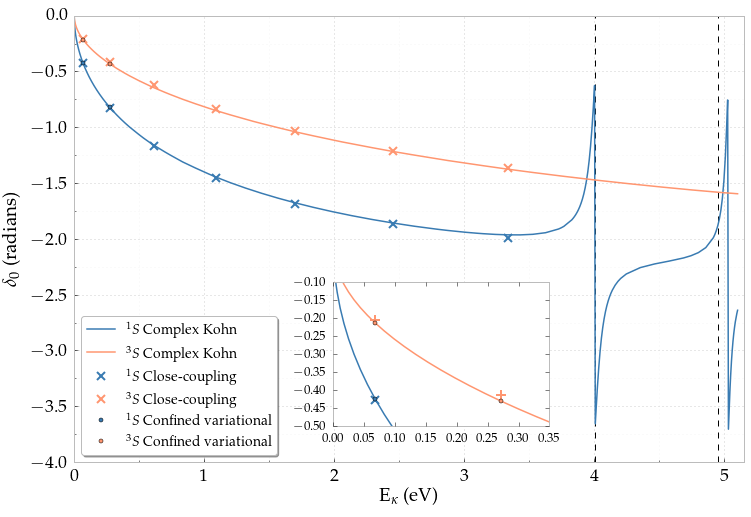

In [26]:
fig = pyplot.figure()
pyplot.axvline(x=4.0058, color='black', ls='dashed', lw=1)
pyplot.axvline(x=4.9479, color='black', ls='dashed', lw=1)
##df.plot(x='E', y='Phase1S', marker='.', markersize=0.01, label=r'$^1S$ Complex Kohn', color=singletcolor)
##df.plot(x='E', y='Phase3S', marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase1S'], marker='.', markersize=0.01, label=r'$^1S$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase3S'], marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)
#df.plot(x='E', y='Phase3S', style='--', marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)
#pyplot.plot(E1G, sls1G, '--', marker='o', markersize=0.01, label='$^1G$ Born', color=singletcolor)
#dfsub1S = df[(df.L == 0) & (df.IsTriplet == 0)]
#dfsub3S = df[(df.L == 0) & (df.IsTriplet == 1)]
#dfsub1S.plot(x='E', y='Phase', marker='.', markersize=0.01, label=r'$^1S$ Complex Kohn', color=singletcolor)
#dfsub3S.plot(x='E', y='Phase', marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)
pyplot.plot(WaltersE, Walters1S, 'x', markersize=8, mew=2, label=r'$^1S$ Close-coupling', color=singletcolor)
pyplot.plot(WaltersE, Walters3S, 'x', markersize=8, mew=2, label=r'$^3S$ Close-coupling', color=tripletcolor)
pyplot.plot(ZhangE, Zhang1S, 'o', markersize=4, label=r'$^1S$ Confined variational', color=singletcolor)
pyplot.plot(ZhangE, Zhang3S, 'o', markersize=4, label=r'$^3S$ Confined variational', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_0$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)

ax = plt.gca()
axins = inset_axes(ax, 3, 2, loc=9, bbox_to_anchor=(0.55, 0.45), bbox_transform=ax.figure.transFigure) # zoom = 6

p1S = np.array(df['Phase1S'].tolist())
p3S = np.array(df['Phase3S'].tolist())
ES = np.array(df['E'].tolist())

pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
pyplot.plot(ES, p1S, '-', marker='.', markersize=0.01, color=singletcolor, label='Singlet')
pyplot.plot(ES, p3S, '-', marker='.', markersize=0.01, color=tripletcolor, label='Triplet')
pyplot.plot(WaltersE, Walters1S, 'x', markersize=8, mew=2, color=singletcolor)
pyplot.plot(WaltersE, Walters3S, '+', markersize=10, mew=2, color=tripletcolor)
pyplot.plot(ZhangE, Zhang1S, 'o', markersize=4, label=r'$^1S$ Confined variational', color=singletcolor)
pyplot.plot(ZhangE, Zhang3S, 'o', markersize=4, label=r'$^3S$ Confined variational', color=tripletcolor)

axins.axis([0.0, 0.35, -0.5, -0.1])
pyplot.xticks(fontsize = 13) # work on current fig
pyplot.yticks(fontsize = 13) # work on current fig

pyplot.savefig("swave-phases.pdf", bbox_inches='tight')
pyplot.show()

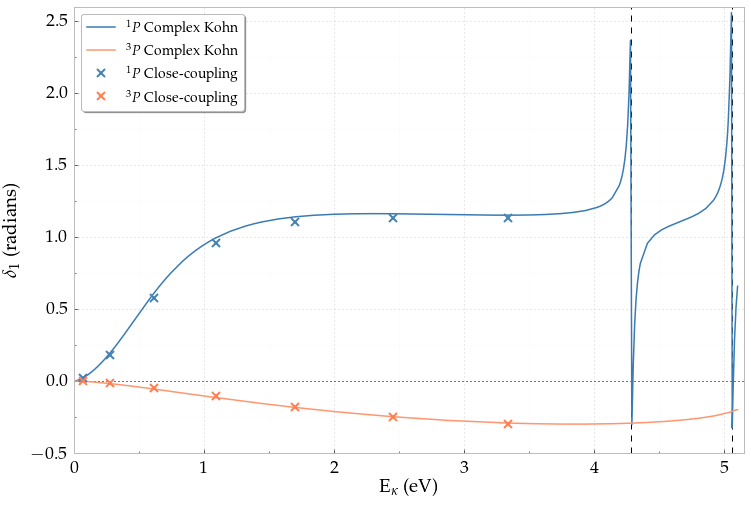

In [27]:
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
pyplot.axvline(x=4.2858, color='black', ls='dashed', lw=1)
pyplot.axvline(x=5.0585, color='black', ls='dashed', lw=1)
#df.plot(x='E', y='Phase1P', marker='.', markersize=0.01, label=r'$^1P$ Complex Kohn', color=singletcolor)
#df.plot(x='E', y='Phase3P', marker='.', markersize=0.01, label=r'$^3P$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase1P'], marker='.', markersize=0.01, label=r'$^1P$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase3P'], marker='.', markersize=0.01, label=r'$^3P$ Complex Kohn', color=tripletcolor)
pyplot.plot(WaltersE, Walters1P, 'x', markersize=8, mew=2, label=r'$^1P$ Close-coupling', color='steelblue')
pyplot.plot(WaltersE, Walters3P, 'x', markersize=8, mew=2, label=r'$^3P$ Close-coupling', color='coral')
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_1$ (radians)")
pyplot.xlim([0,5.15])
pyplot.ylim([-0.5,2.6])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("pwave-phases.pdf", bbox_inches='tight')
pyplot.show()

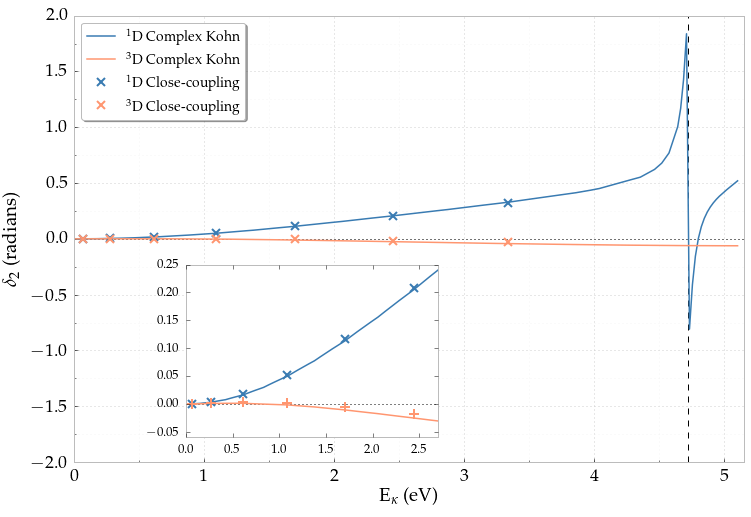

In [28]:
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
pyplot.axvline(x=4.7192, color='black', ls='dashed', lw=1)
#df.plot(x='E', y='Phase1D', marker='.', markersize=0.01, label=r'$^1$D Complex Kohn', color=singletcolor)
#df.plot(x='E', y='Phase3D', marker='.', markersize=0.01, label=r'$^3$D Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase1D'], marker='.', markersize=0.01, label=r'$^1$D Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase3D'], marker='.', markersize=0.01, label=r'$^3$D Complex Kohn', color=tripletcolor)
pyplot.plot(WaltersE, Walters1D, 'x', markersize=8, mew=2, label=r'$^1$D Close-coupling', color=singletcolor)
pyplot.plot(WaltersE, Walters3D, 'x', markersize=8, mew=2, label=r'$^3$D Close-coupling', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_2$ (radians)")
pyplot.xlim([0, 5.15])
pyplot.ylim([-2, 2])
pyplot.legend()
FixPlot(plt)

ax = plt.gca()
p1D = np.array(df['Phase1D'].tolist())
p3D = np.array(df['Phase3D'].tolist())
ED = np.array(df['E'].tolist())

axins = inset_axes(ax, 3.5, 2.4, loc=9, bbox_to_anchor=(0.4, 0.48), bbox_transform=ax.figure.transFigure) # zoom = 6

pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
pyplot.plot(ED, p1D, '-', marker='.', markersize=0.01, color=singletcolor, label='Singlet')
pyplot.plot(ED, p3D, '-', marker='.', markersize=0.01, color=tripletcolor, label='Triplet')
pyplot.plot(WaltersE, Walters1D, 'x', markersize=8, mew=2, color=singletcolor)
pyplot.plot(WaltersE, Walters3D, '+', markersize=10, mew=2, color=tripletcolor)

axins.axis([0.0, 2.7, -0.06, 0.25])
pyplot.xticks(fontsize = 13) # work on current fig
pyplot.yticks(fontsize = 13) # work on current fig

pyplot.savefig("dwave-phases.pdf", bbox_inches='tight')
pyplot.show()

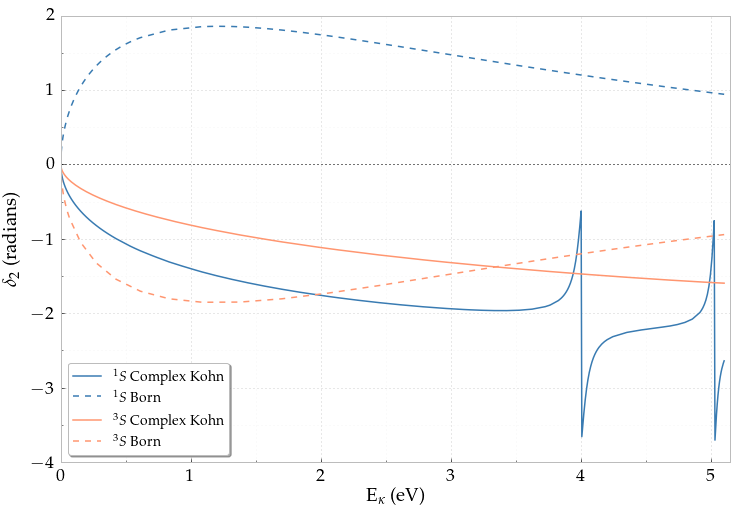

In [29]:
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
#df.plot(x='E', y='Phase1S', marker='.', markersize=0.01, label='$^1S$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase1S'], marker='.', markersize=0.01, label='$^1S$ Complex Kohn', color=singletcolor)
pyplot.plot(E1S, sls1S, '--', marker='o', markersize=0.01, label='$^1S$ Born', color=singletcolor)
#df.plot(x='E', y='Phase3S', marker='.', markersize=0.01, label='$^3S$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase3S'], marker='.', markersize=0.01, label='$^3S$ Complex Kohn', color=tripletcolor)
pyplot.plot(E3S, sls3S, '--', marker='o', markersize=0.01, label='$^3S$ Born', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_2$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("swave-phase-born.pdf", bbox_inches='tight')
pyplot.show()

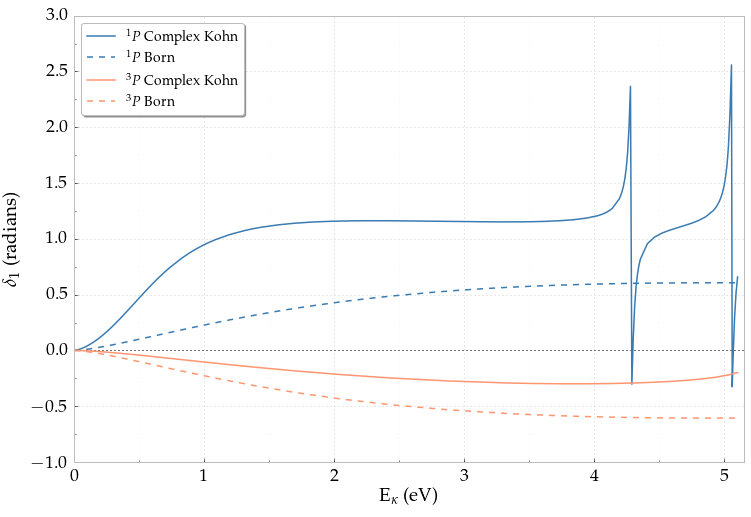

In [30]:
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
#df.plot(x='E', y='Phase1P', marker='.', markersize=0.01, label='$^1P$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase1P'], marker='.', markersize=0.01, label='$^1P$ Complex Kohn', color=singletcolor)
pyplot.plot(E1P, sls1P, '--', marker='o', markersize=0.01, label='$^1P$ Born', color=singletcolor)
#df.plot(x='E', y='Phase3P', marker='.', markersize=0.01, label='$^3P$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase3P'], marker='.', markersize=0.01, label='$^3P$ Complex Kohn', color=tripletcolor)
pyplot.plot(E3P, sls3P, '--', marker='o', markersize=0.01, label='$^3P$ Born', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_1$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("pwave-phase-born.pdf", bbox_inches='tight')
pyplot.show()

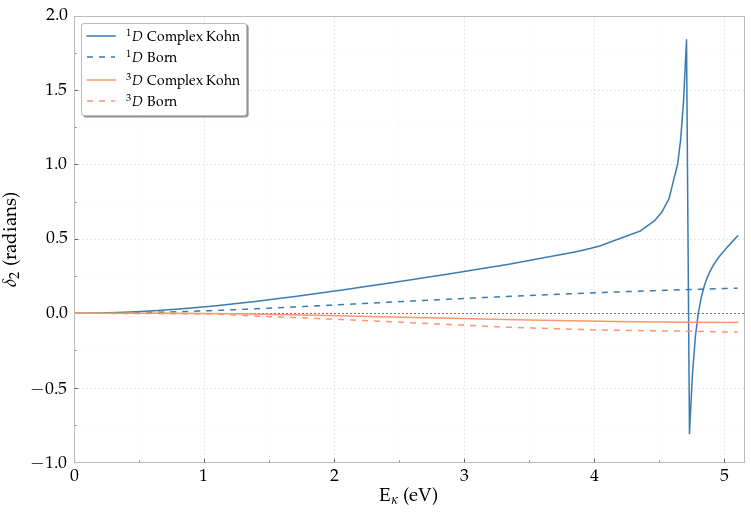

In [31]:
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
#df.plot(x='E', y='Phase1D', marker='.', markersize=0.01, label='$^1D$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase1D'], marker='.', markersize=0.01, label='$^1D$ Complex Kohn', color=singletcolor)
pyplot.plot(E1D, sls1D, '--', marker='o', markersize=0.01, label='$^1D$ Born', color=singletcolor)
#df.plot(x='E', y='Phase3D', marker='.', markersize=0.01, label='$^3D$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase3D'], marker='.', markersize=0.01, label='$^3D$ Complex Kohn', color=tripletcolor)
pyplot.plot(E3D, sls3D, '--', marker='o', markersize=0.01, label='$^3D$ Born', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_2$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("dwave-phase-born.pdf", bbox_inches='tight')
pyplot.show()

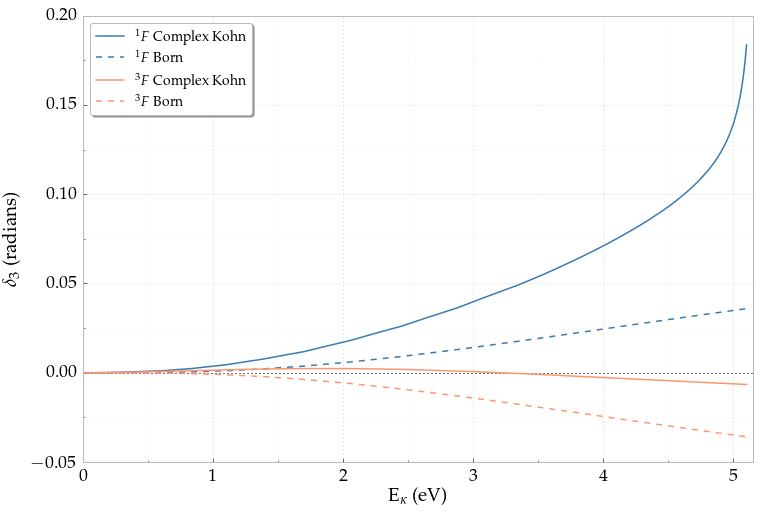

In [32]:
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
#df.plot(x='E', y='Phase1F', marker='.', markersize=0.01, label='$^1F$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase1F'], marker='.', markersize=0.01, label='$^1F$ Complex Kohn', color=singletcolor)
pyplot.plot(E1F, sls1F, '--', marker='o', markersize=0.01, label='$^1F$ Born', color=singletcolor)
#df.plot(x='E', y='Phase3F', marker='.', markersize=0.01, label='$^3F$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase3F'], marker='.', markersize=0.01, label='$^3F$ Complex Kohn', color=tripletcolor)
pyplot.plot(E3F, sls3F, '--', marker='o', markersize=0.01, label='$^3F$ Born', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_3$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("fwave-phases.pdf", bbox_inches='tight')
pyplot.show()

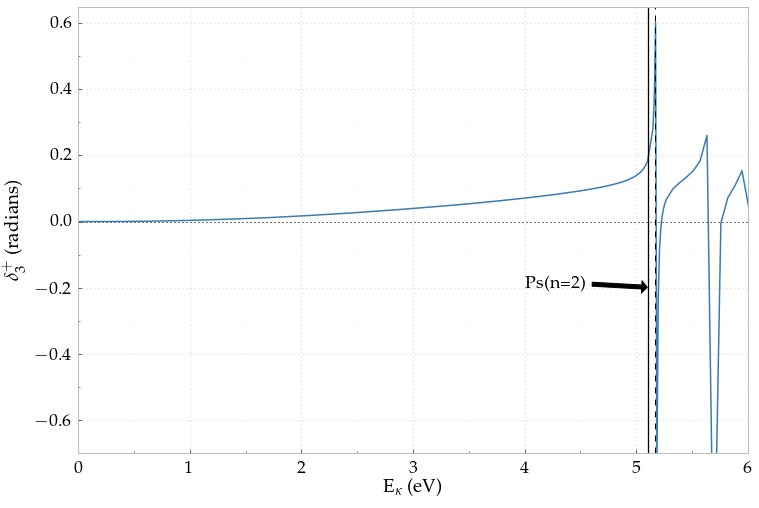

In [33]:
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
pyplot.plot(E1FFull, phase1FFull, marker='.', markersize=0.01, label='$^1$F Complex Kohn', color=singletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_3^+$ (radians)")
pyplot.xlim([0,6])
pyplot.ylim([-0.7,0.65])
pyplot.axvline(x=5.101835, color='black', lw=1.3)
pyplot.axvline(x=5.1661, color='black', ls='dashed', lw=1)
plt.annotate('Ps(n=2)', xy=(5.16, -0.2), xytext=(4.0, -0.2),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
#pyplot.legend()
FixPlot(plt)
pyplot.savefig("fwave-phases-full.pdf", bbox_inches='tight')
pyplot.show()

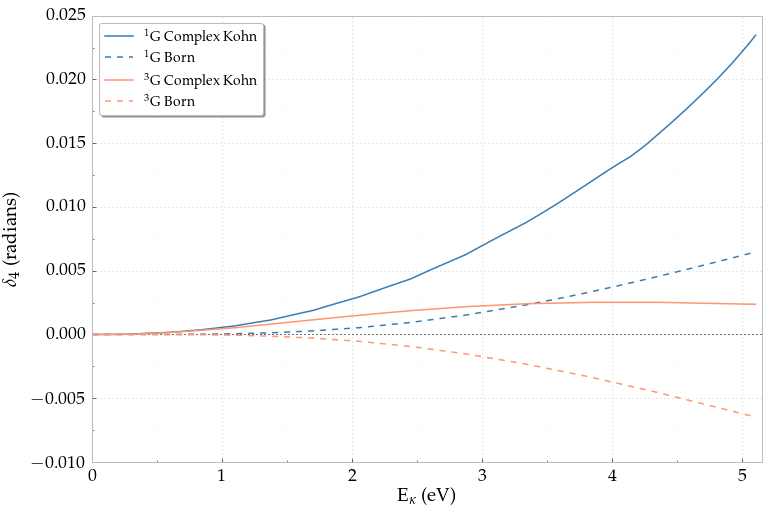

In [34]:
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
#df.plot(x='E', y='Phase1G', marker='.', markersize=0.01, label='$^1$G Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase1G'], marker='.', markersize=0.01, label='$^1$G Complex Kohn', color=singletcolor)
pyplot.plot(E1G, sls1G, '--', marker='o', markersize=0.01, label='$^1$G Born', color=singletcolor)
#df.plot(x='E', y='Phase3G', marker='.', markersize=0.01, label='$^3$G Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase3G'], marker='.', markersize=0.01, label='$^3$G Complex Kohn', color=tripletcolor)
pyplot.plot(E3G, sls3G, '--', marker='o', markersize=0.01, label='$^3$G Born', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_4$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("gwave-phases.pdf", bbox_inches='tight')
pyplot.show()

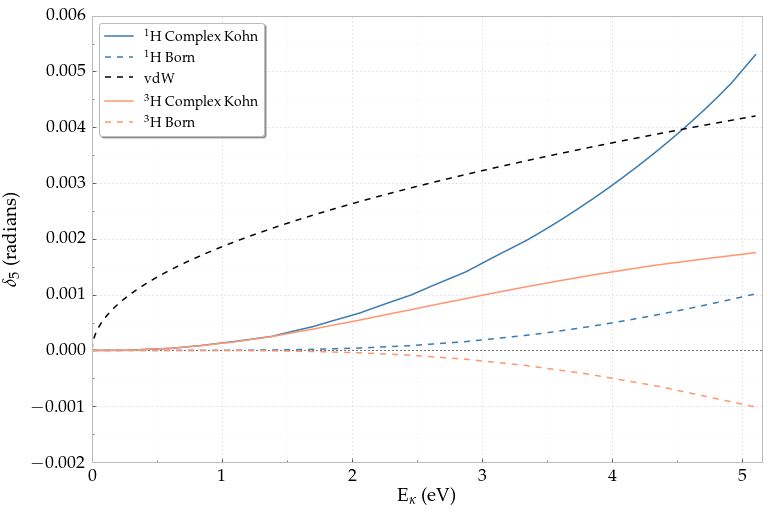

In [125]:
def vdWApprox(kappa, L):
    C6 = 34.78473
    Coeff = 6 * C6 * np.pi / ((2*L+5)*(2*L+3)*(2*L+1)*(2*L-1)*(2*L-3))
    return np.arctan(Coeff * kappa)

testH = vdWApprox(df['Kappa'], 5)

pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
#df.plot(x='E', y='Phase1H', marker='.', markersize=0.01, label='$^1$H Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase1H'], marker='.', markersize=0.01, label='$^1$H Complex Kohn', color=singletcolor)
pyplot.plot(E1H, sls1H, '--', marker='o', markersize=0.01, label='$^1$H Born', color=singletcolor)
pyplot.plot(df['E'], testH, '--', marker='o', markersize=0.01, label='vdW', color='black')
pyplot.plot(df['E'], df['Phase3H'], marker='.', markersize=0.01, label='$^3$H Complex Kohn', color=tripletcolor)
pyplot.plot(E3H, sls3H, '--', marker='o', markersize=0.01, label='$^3$H Born', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_5$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("hwave-test-phases.pdf", bbox_inches='tight')
pyplot.show()

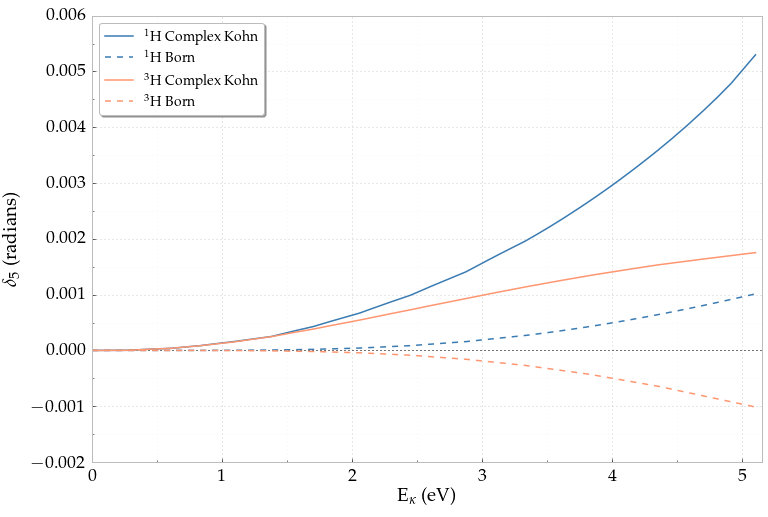

In [35]:
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
#df.plot(x='E', y='Phase1H', marker='.', markersize=0.01, label='$^1$H Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase1H'], marker='.', markersize=0.01, label='$^1$H Complex Kohn', color=singletcolor)
pyplot.plot(E1H, sls1H, '--', marker='o', markersize=0.01, label='$^1$H Born', color=singletcolor)
#df.plot(x='E', y='Phase3H', marker='.', markersize=0.01, label='$^3$H Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase3H'], marker='.', markersize=0.01, label='$^3$H Complex Kohn', color=tripletcolor)
pyplot.plot(E3H, sls3H, '--', marker='o', markersize=0.01, label='$^3$H Born', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_5$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("hwave-phases.pdf", bbox_inches='tight')
pyplot.show()

## Comparisons with Other Groups

#### S-Wave

In [36]:
data = np.genfromtxt('Comparison S-Wave Singlet Results.txt', 
                     comments='#',    # skip comment lines
                     dtype = None,    # guess dtype of each column
                     names=True)      # use first line as column names

[Blackwood1S2002, Walters1S2004, Ray1S1997, Campbell1S1998, Sinha1S1997, Adhikari1S1999, Fraser1S1961, Drachman1S1975, Chiesa1S2002,
         Ivanov1S2002, Hara1S1975, Sinha1S2000, Ivanov1S2001, VanReeth1S2003, Zhang1S2012, Biswas1S2001, Biswas1S2003] = [data[7:14], data[14:21], data[21:28], data[28:31], data[31:38],
                                       data[38:45], data[45:52], data[52:55], data[55:60], data[60:67], data[67:74], data[74:78], data[78:84], data[84:91], data[91:93], data[93:100], data[100:106]]

In [37]:
data = np.genfromtxt('Comparison S-Wave Triplet Results.txt', 
                     comments='#',    # skip comment lines
                     dtype = None,    # guess dtype of each column
                     names=True)      # use first line as column names

#[Blackwood3S2002, Ray3S, Campbell3S, Sinha3S1997, Adhikari3S, Drachman3S, Chiesa3S, Ivanov3S, Hara3S, Sinha3S2000] = [data[]]
[Blackwood3S2002, Ray3S1997, Campbell3S1998, Sinha3S1997, Adhikari3S1999, Drachman3S1976, Chiesa3S2002,
  Ivanov3S2002, Hara3S1975, Sinha3S2000, Ivanov3S2001, VanReeth3S2003, Zhang3S2012, Biswas3S2001] = [data[7:14], data[14:21], data[21:26], data[26:33], data[33:40], data[40:45], data[45:50], data[50:57], data[57:64], data[64:69], data[69:75], data[75:82], data[82:84], data[84:91]]

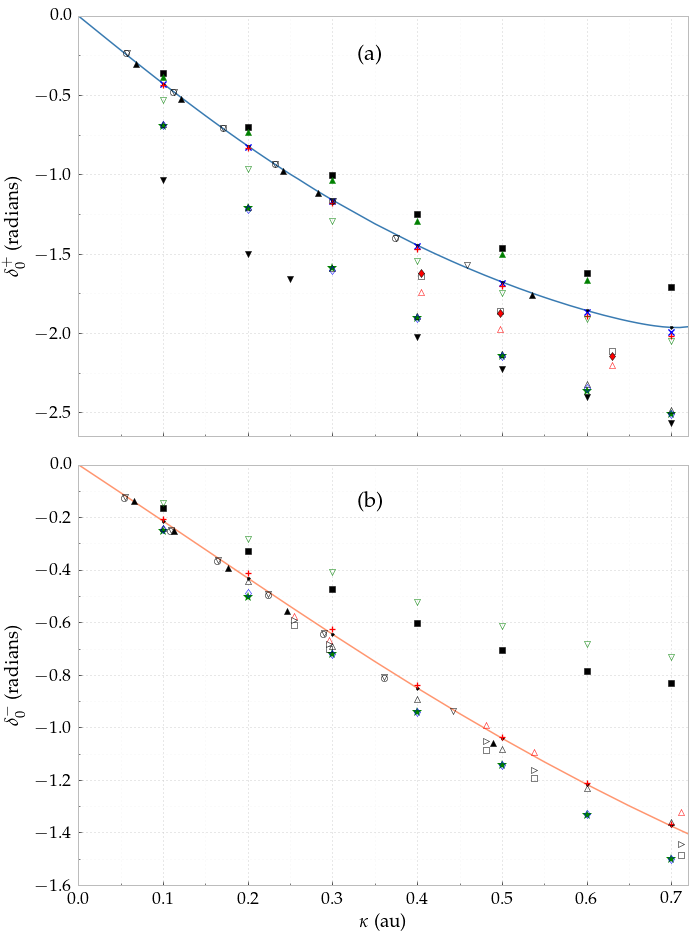

In [38]:
fig = pyplot.figure(figsize=(10, 6.7*2))

###########
# Singlet #
###########
pyplot.subplot(2, 1, 1)

pyplot.plot(df['Kappa'], df['Phase1S'], marker='.', markersize=0.01, color=singletcolor)
#pyplot.plot(Zhang1S2012['kappa'], Zhang1S2012['phase'], 'bx')
pyplot.plot(Ray1S1997['kappa'], Ray1S1997['phase'], 'g*', markersize=10, markerfacecolor='g', markeredgecolor='none')
pyplot.plot(Walters1S2004['kappa'], Walters1S2004['phase'], 'bx', mew=1.3)
pyplot.plot(VanReeth1S2003['kappa'], VanReeth1S2003['phase'], 'k.')
pyplot.plot(Walters1S2004['kappa'], Walters1S2004['phase'], 'bx')
pyplot.plot(Blackwood1S2002['kappa'], Blackwood1S2002['phase'], 'r+', mew=1.3)
pyplot.plot(Chiesa1S2002['kappa'], Chiesa1S2002['phase'], 'k^')
pyplot.plot(Ivanov1S2002['kappa'], Ivanov1S2002['phase'], 'kv', markerfacecolor='none', markeredgecolor='k')
pyplot.plot(Ivanov1S2001['kappa'], Ivanov1S2001['phase'], 'ko', markerfacecolor='none')
pyplot.plot(Sinha1S2000['kappa'], Sinha1S2000['phase'], '^', markerfacecolor='none', markeredgecolor='r')
pyplot.plot(Adhikari1S1999['kappa'], Adhikari1S1999['phase'], 'ks')
pyplot.plot(Campbell1S1998['kappa'], Campbell1S1998['phase'], 's', markerfacecolor='none', markeredgecolor='k')
pyplot.plot(Sinha1S1997['kappa'], Sinha1S1997['phase'], '^', markerfacecolor='none', markeredgecolor='k')
pyplot.plot(Drachman1S1975['kappa'], Drachman1S1975['phase'], 'rd')
pyplot.plot(Hara1S1975['kappa'], Hara1S1975['phase'], 'd', markerfacecolor='none', markeredgecolor='b')
pyplot.plot(Fraser1S1961['kappa'], Fraser1S1961['phase'], 'kv')
pyplot.plot(Biswas1S2001['kappa'], Biswas1S2001['phase'], 'v', markerfacecolor='none', markeredgecolor='g')
pyplot.plot(Biswas1S2003['kappa'], Biswas1S2003['phase'], '^', markerfacecolor='g', markeredgecolor='g')
#pyplot.xlabel(r"$\kappa$ (au)")
pyplot.ylabel(r"$\delta_0^+$ (radians)")

ax = plt.gca()
ax.set_xticklabels([])
ax.text(0.33, -0.28, '(a)', fontsize=22)

pyplot.xlim([0, 0.72])
pyplot.ylim([-2.65, 0])
FixPlot(plt)

###########
# Triplet #
###########
pyplot.subplot(2, 1, 2)

#df.plot(x='Kappa', y='Phase3S', marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['Kappa'], df['Phase3S'], marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)
pyplot.plot(Ray3S1997['kappa'], Ray3S1997['phase'], 'g*', markersize=10, markerfacecolor='g', markeredgecolor='none', label='Ray 1997')
pyplot.plot(VanReeth3S2003['kappa'], VanReeth3S2003['phase'], 'k.')
pyplot.plot(Blackwood3S2002['kappa'], Blackwood3S2002['phase'], 'r+', label='Blackwood 2002', mew=1.3)
pyplot.plot(Chiesa3S2002['kappa'], Chiesa3S2002['phase'], 'k^', label='Chiesa 2002')
pyplot.plot(Ivanov3S2002['kappa'], Ivanov3S2002['phase'], 'kv', markerfacecolor='none', markeredgecolor='k', label='Ivanov 2002')
pyplot.plot(Ivanov3S2001['kappa'], Ivanov3S2001['phase'], 'ko', markerfacecolor='none')
pyplot.plot(Sinha3S2000['kappa'], Sinha3S2000['phase'], '^', markerfacecolor='none', markeredgecolor='r', label='Sinha 2000')
pyplot.plot(Adhikari3S1999['kappa'], Adhikari3S1999['phase'], 'ks', label='Adhikari 1999')
pyplot.plot(Campbell3S1998['kappa'], Campbell3S1998['phase'], 's', markerfacecolor='none', markeredgecolor='k', label='Campbell 1998')
pyplot.plot(Sinha3S1997['kappa'], Sinha3S1997['phase'], '^', markerfacecolor='none', markeredgecolor='k', label='Sinha 1997')
#pyplot.plot(Drachman3S1976['kappa'], Drachman3S1976['phase'], 'rd', label='Drachman 1975')
pyplot.plot(Drachman3S1976['kappa'], Drachman3S1976['phase'], 'w>', label='Drachman 1975')
pyplot.plot(Hara3S1975['kappa'], Hara3S1975['phase'], 'd', markerfacecolor='none', markeredgecolor='b', label='Hara 1975')
pyplot.plot(Biswas3S2001['kappa'], Biswas3S2001['phase'], 'v', markerfacecolor='none', markeredgecolor='g')
pyplot.xlabel(r"$\kappa$ (au)")
pyplot.ylabel(r"$\delta_0^-$ (radians)")

ax = plt.gca()
#ax.set_xticklabels([])
ax.text(0.33, -0.16, '(b)', fontsize=22)

pyplot.xlim([0, 0.72])
FixPlot(plt)

plt.tight_layout()
pyplot.savefig('swave-comparisons.pdf', bbox_inches='tight')
pyplot.show()

#### P-Wave

In [39]:
data = np.genfromtxt('Comparison P-Wave Singlet Results.txt', 
                     comments='#',    # skip comment lines
                     dtype = None,    # guess dtype of each column
                     names=True)      # use first line as column names

[Blackwood1P2002, Walters1P2004, Ray1P1997, Sinha1P1997, Adhikari1P1999,
         Ivanov1P2002, Hara1P1975, Sinha1P2000] = [data[0:8], data[8:15], data[15:23], data[23:31],
                                       data[31:39], data[39:45], data[45:52], data[52:59]]

In [40]:
data = np.genfromtxt('Comparison P-Wave Triplet Results.txt', 
                     comments='#',    # skip comment lines
                     dtype = None,    # guess dtype of each column
                     names=True)      # use first line as column names


[Blackwood3P2002, Ray3P1997, Sinha3P1997, Adhikari3P1999,
         Ivanov3P2002, Hara3P1975, Sinha3P2000] = [data[0:8], data[8:16], data[16:24], data[24:32],
                                       data[32:38], data[38:45], data[45:52]]

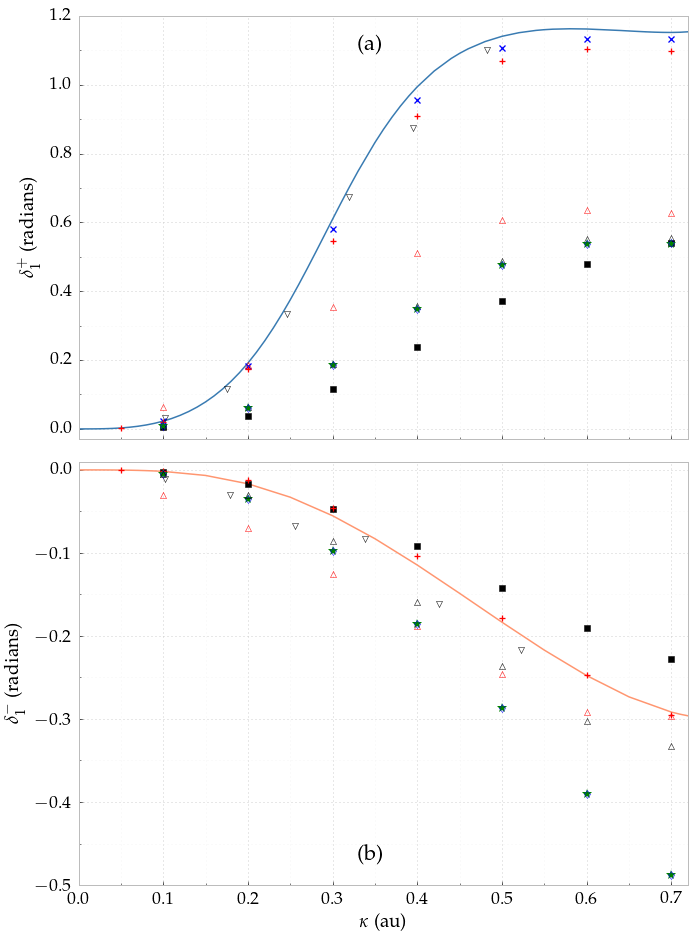

In [41]:
fig = pyplot.figure(figsize=(10, 6.7*2))

###########
# Singlet #
###########
pyplot.subplot(2, 1, 1)

pyplot.plot(df['Kappa'], df['Phase1P'], marker='.', markersize=0.01, color=singletcolor)
pyplot.plot(Walters1P2004['kappa'], Walters1P2004['phase'], 'bx', mew=1.3)
pyplot.plot(Blackwood1P2002['kappa'], Blackwood1P2002['phase'], 'r+', mew=1.3)
pyplot.plot(Ivanov1P2002['kappa'], Ivanov1P2002['phase'], 'kv', markerfacecolor='none', markeredgecolor='k')
pyplot.plot(Sinha1P2000['kappa'], Sinha1P2000['phase'], '^', markerfacecolor='none', markeredgecolor='r',)
pyplot.plot(Adhikari1P1999['kappa'], Adhikari1P1999['phase'], 'ks')
pyplot.plot(Sinha1P1997['kappa'], Sinha1P1997['phase'], '^', markerfacecolor='none', markeredgecolor='k')
pyplot.plot(Ray1P1997['kappa'], Ray1P1997['phase'], 'g*', markersize=10, markerfacecolor='g', markeredgecolor='none')
pyplot.plot(Hara1P1975['kappa'], Hara1P1975['phase'], 'd', markerfacecolor='none', markeredgecolor='b')
#pyplot.xlabel(r"$\kappa$ (au)")
pyplot.ylabel(r"$\delta_1^+$ (radians)")

ax = plt.gca()
ax.set_xticklabels([])
ax.text(0.33, 1.1, '(a)', fontsize=22)

pyplot.xlim([0, 0.72])
pyplot.ylim([-0.03, 1.2])
FixPlot(plt)

###########
# Triplet #
###########
pyplot.subplot(2, 1, 2)

#df.plot(x='Kappa', y='Phase3P', marker='.', markersize=0.01, label=r'$^3P$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['Kappa'], df['Phase3P'], marker='.', markersize=0.01, label=r'$^3P$ Complex Kohn', color=tripletcolor)
pyplot.plot(Adhikari3P1999['kappa'], Adhikari3P1999['phase'], 'ks', label='Adhikari 1999')
pyplot.plot(Blackwood3P2002['kappa'], Blackwood3P2002['phase'], 'r+', label='Blackwood 2002', mew=1.3)
pyplot.plot(Ivanov3P2002['kappa'], Ivanov3P2002['phase'], 'kv', markerfacecolor='none', markeredgecolor='k', label='Ivanov 2002')
pyplot.plot(Sinha3P2000['kappa'], Sinha3P2000['phase'], '^', markerfacecolor='none', markeredgecolor='r',)
pyplot.plot(Ray3P1997['kappa'], Ray3P1997['phase'], 'g*', markersize=10, markerfacecolor='g', markeredgecolor='none', label='Ray 1997')
pyplot.plot(Hara3P1975['kappa'], Hara3P1975['phase'], 'd', markerfacecolor='none', markeredgecolor='b', label='Hara 1975')
pyplot.plot(Sinha3P1997['kappa'], Sinha3P1997['phase'], '^', markerfacecolor='none', markeredgecolor='k', label='Sinha 1997')
pyplot.xlabel(r"$\kappa$ (au)")
pyplot.ylabel(r"$\delta_1^-$ (radians)")

ax = plt.gca()
#ax.set_xticklabels([])
ax.text(0.33, -0.47, '(b)', fontsize=22)

pyplot.xlim([0, 0.72])
pyplot.ylim([-0.5, 0.01])
FixPlot(plt)

plt.tight_layout()
pyplot.savefig('pwave-comparisons.pdf', bbox_inches='tight')
pyplot.show()

#### D-Wave

In [42]:
data = np.genfromtxt('Comparison D-Wave Singlet Results.txt', 
                     comments='#',    # skip comment lines
                     dtype = None,    # guess dtype of each column
                     names=True)      # use first line as column names

[Blackwood1D2002, Walters1D2004, Ray1D1997, Sinha1D1997, Adhikari1D1999,
         Hara1D1975, Sinha1D2000] = [data[0:8], data[8:15], data[15:22], data[22:29],
                                       data[29:36], data[36:43], data[43:50]]

In [43]:
data = np.genfromtxt('Comparison D-Wave Triplet Results.txt', 
                     comments='#',    # skip comment lines
                     dtype = None,    # guess dtype of each column
                     names=True)      # use first line as column names

[Blackwood3D2002, Ray3D1997, Sinha3D1997, Adhikari3D1999,
         Hara3D1975, Sinha3D2000] = [data[0:8], data[8:15], data[15:22], data[22:29],
                                       data[29:36], data[36:43]]

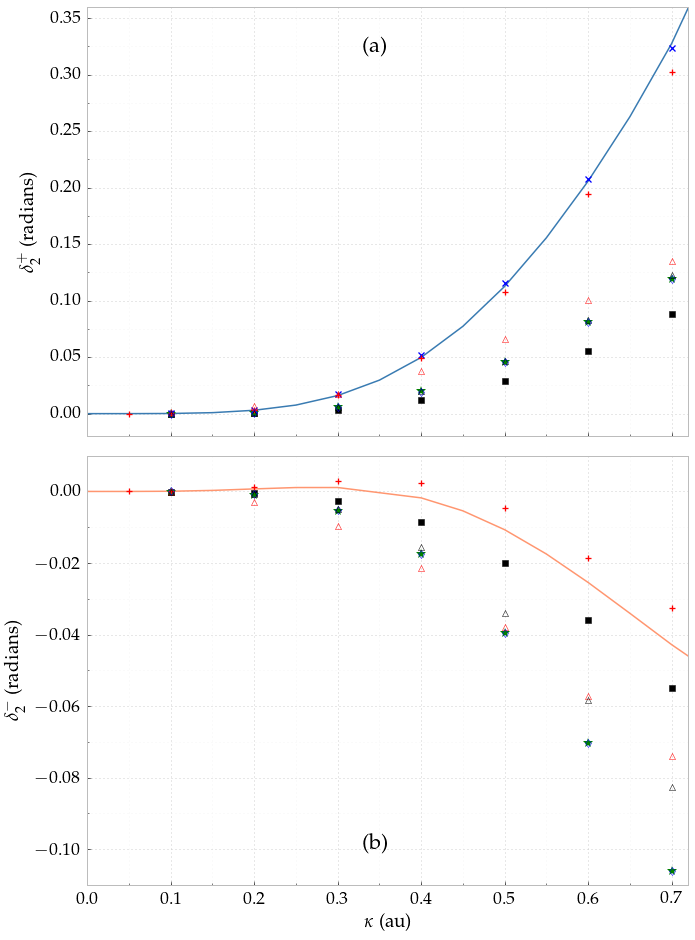

In [44]:
fig = pyplot.figure(figsize=(10, 6.7*2))

###########
# Singlet #
###########
pyplot.subplot(2, 1, 1)

pyplot.plot(df['Kappa'], df['Phase1D'], marker='.', markersize=0.01, color=singletcolor)
pyplot.plot(Adhikari1D1999['kappa'], Adhikari1D1999['phase'], 'ks')
pyplot.plot(Ray1D1997['kappa'], Ray1D1997['phase'], 'g*', markersize=10, markerfacecolor='g', markeredgecolor='none')
pyplot.plot(Walters1D2004['kappa'], Walters1D2004['phase'], 'bx', mew=1.3)
pyplot.plot(Blackwood1D2002['kappa'], Blackwood1D2002['phase'], 'r+', mew=1.3)
pyplot.plot(Sinha1D2000['kappa'], Sinha1D2000['phase'], '^', markerfacecolor='none', markeredgecolor='r',)
pyplot.plot(Sinha1D1997['kappa'], Sinha1D1997['phase'], '^', markerfacecolor='none', markeredgecolor='k')
pyplot.plot(Hara1D1975['kappa'], Hara1D1975['phase'], 'd', markerfacecolor='none', markeredgecolor='b')
#pyplot.xlabel(r"$\kappa$ (au)")
pyplot.ylabel(r"$\delta_2^+$ (radians)")

ax = plt.gca()
ax.set_xticklabels([])
ax.text(0.33, 0.32, '(a)', fontsize=22)

pyplot.xlim([0, 0.72])
pyplot.ylim([-0.02, 0.36])
FixPlot(plt)

###########
# Triplet #
###########
pyplot.subplot(2, 1, 2)

#df.plot(x='Kappa', y='Phase3D', marker='.', markersize=0.01, label=r'$^3D$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['Kappa'], df['Phase3D'], marker='.', markersize=0.01, label=r'$^3D$ Complex Kohn', color=tripletcolor)
pyplot.plot(Adhikari3D1999['kappa'], Adhikari3D1999['phase'], 'ks', label='Adhikari 1999')
pyplot.plot(Ray3D1997['kappa'], Ray3D1997['phase'], 'g*', markersize=10, markerfacecolor='g', markeredgecolor='none', label='Ray 1997')
pyplot.plot(Blackwood3D2002['kappa'], Blackwood3D2002['phase'], 'r+', mew=1.3, label='Blackwood 2002')
pyplot.plot(Sinha3D2000['kappa'], Sinha3D2000['phase'], '^', markerfacecolor='none', markeredgecolor='r',)
pyplot.plot(Hara3D1975['kappa'], Hara3D1975['phase'], 'd', markerfacecolor='none', markeredgecolor='b', label='Hara 1975')
pyplot.plot(Sinha3D1997['kappa'], Sinha3D1997['phase'], '^', markerfacecolor='none', markeredgecolor='k', label='Sinha 1997')
pyplot.xlabel(r"$\kappa$ (au)")
pyplot.ylabel(r"$\delta_2^-$ (radians)")

ax = plt.gca()
#ax.set_xticklabels([])
ax.text(0.33, -0.1, '(b)', fontsize=22)

pyplot.xlim([0, 0.72])
pyplot.ylim([-0.11, 0.01])
FixPlot(plt)

plt.tight_layout()
pyplot.savefig('dwave-comparisons.pdf', bbox_inches='tight')
pyplot.show()

## Creating Interpolated Functions and Plotting

The partial waves all have phase shifts and cross sections calculated for different $\kappa$. For us to calculate the total cross sections, we can choose a set of points that all three share in common, but this would drastically reduce the points, especially near the resonances. So we use Python's interp1d linear interpolation function to create a function for the 4 curves, then create lists with these functions stored in the interp_plotc lists. The total cross section plot is then found by summing these 4 lists.

In [45]:
df['Cross1'] = 0.25*(df['Cross1S'] + df['Cross1P'] + df['Cross1D'] + df['Cross1F'] + df['Cross1G'] + df['Cross1H'])
df['Cross3'] = 0.75*(df['Cross3S'] + df['Cross3P'] + df['Cross3D'] + df['Cross3F'] + df['Cross3G'] + df['Cross3H'])
df['Cross'] = df['Cross1'] + df['Cross3']

For the total cross section, including both the singlet and the triplet states, the singlet contributes $\frac{1}{4}$, and the triplet contributes $\frac{3}{4}$. **Note:** Where did I find this information? Maybe look at notes from when Dr. Robicheaux met with us.

### Read in Walters, Hara and Blackwood Cross Sections

In [46]:
# These are all obtained using CurveSnap
datanp = numpy.loadtxt('Walters Cross Section.csv', dtype=float, delimiter=',')
datanpt = np.transpose(datanp)
dataws = numpy.loadtxt('Walters S-Wave Singlet Cross.csv', dtype=float, delimiter=',')
datawst = np.transpose(dataws)
datawp = numpy.loadtxt('Walters P-Wave Singlet Cross.csv', dtype=float, delimiter=',')
datawpt = np.transpose(datawp)
datawd = numpy.loadtxt('Walters D-Wave Singlet Cross.csv', dtype=float, delimiter=',')
datawdt = np.transpose(datawd)
Walters3SCross = numpy.loadtxt('Walters S-Wave Triplet Cross.csv', dtype=float, delimiter=',')
Walters3SCross = np.transpose(Walters3SCross)
Walters3PCross = numpy.loadtxt('Walters P-Wave Triplet Cross.csv', dtype=float, delimiter=',')
Walters3PCross = np.transpose(Walters3PCross)
Walters3DCross = numpy.loadtxt('Blackwood D-Wave Triplet Cross.csv', dtype=float, delimiter=',')
Walters3DCross = np.transpose(Walters3DCross)

BlackwoodH1SCross = numpy.loadtxt('Blackwood H- S-wave Cross.csv', dtype=float, delimiter=',')
BlackwoodH1SCross = np.transpose(BlackwoodH1SCross)
BlackwoodH1PCross = numpy.loadtxt('Blackwood H- P-wave Cross.csv', dtype=float, delimiter=',')
BlackwoodH1PCross = np.transpose(BlackwoodH1PCross)
BlackwoodH1DCross = numpy.loadtxt('Blackwood H- D-wave Cross.csv', dtype=float, delimiter=',')
BlackwoodH1DCross = np.transpose(BlackwoodH1DCross)

datanphc = numpy.loadtxt('Hara - Conversion CS.csv', dtype=float, delimiter=',')
datanpthc = np.transpose(datanphc)

datanpbc = numpy.loadtxt('Blackwood Ortho-Para.csv', dtype=float, delimiter=',')
datanptbc = np.transpose(datanpbc)

datanph = numpy.loadtxt('Hara - Total CS.csv', dtype=float, delimiter=',')
datanpth = np.transpose(datanph)

datanpc = numpy.loadtxt('Campbell Ortho-Para.csv', dtype=float, delimiter=',')
datanptc = np.transpose(datanpc)

### Plot Cross Sections

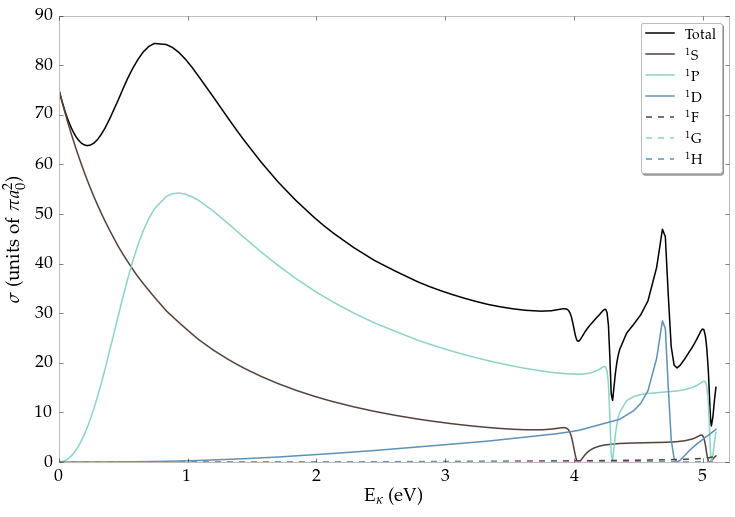

In [47]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
pyplot.plot(df['E'], 4*df['Cross1'], marker='.', markersize=0.01, label='Total', color='black')
#df.plot(x='E', y='Cross1S', marker='.', markersize=0.01, label=r'$^1$S', color=colors[0])
#df.plot(x='E', y='Cross1P', marker='.', markersize=0.01, label=r'$^1$P', color=colors[1])
#df.plot(x='E', y='Cross1D', marker='.', markersize=0.01, label=r'$^1$D', color=colors[2])
#df.plot(x='E', y='Cross1F', marker='.', markersize=0.01, label=r'$^1$F', color=colors[0], ls='dashed')
#df.plot(x='E', y='Cross1G', marker='.', markersize=0.01, label=r'$^1$G', color=colors[1], ls='dashed')
#df.plot(x='E', y='Cross1H', marker='.', markersize=0.01, label=r'$^1$H', color=colors[2], ls='dashed')
pyplot.plot(df['E'], df['Cross1S'], marker='.', markersize=0.01, label=r'$^1$S', color=colors[0])
pyplot.plot(df['E'], df['Cross1P'], marker='.', markersize=0.01, label=r'$^1$P', color=colors[1])
pyplot.plot(df['E'], df['Cross1D'], marker='.', markersize=0.01, label=r'$^1$D', color=colors[2])
pyplot.plot(df['E'], df['Cross1F'], marker='.', markersize=0.01, label=r'$^1$F', color=colors[0], ls='dashed')
pyplot.plot(df['E'], df['Cross1G'], marker='.', markersize=0.01, label=r'$^1$G', color=colors[1], ls='dashed')
pyplot.plot(df['E'], df['Cross1H'], marker='.', markersize=0.01, label=r'$^1$H', color=colors[2], ls='dashed')
pyplot.legend(loc='upper right', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
pyplot.savefig("singlet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

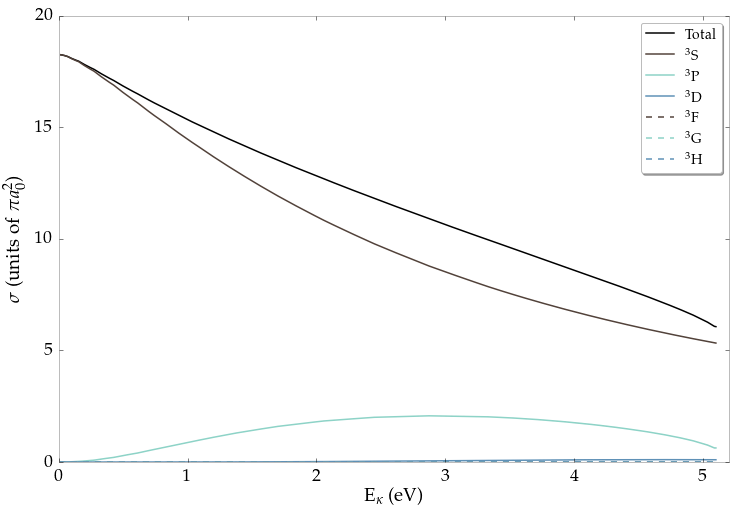

In [48]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
pyplot.plot(df['E'], 4/3.0*df['Cross3'], marker='.', markersize=0.01, label='Total', color='black')
#df.plot(x='E', y='Cross3S', marker='.', markersize=0.01, label=r'$^3$S', color=colors[0])
#df.plot(x='E', y='Cross3P', marker='.', markersize=0.01, label=r'$^3$P', color=colors[1])
#df.plot(x='E', y='Cross3D', marker='.', markersize=0.01, label=r'$^3$D', color=colors[2])
#df.plot(x='E', y='Cross3F', marker='.', markersize=0.01, label=r'$^3$F', color=colors[0], ls='dashed')
#df.plot(x='E', y='Cross3G', marker='.', markersize=0.01, label=r'$^3$G', color=colors[1], ls='dashed')
#df.plot(x='E', y='Cross3H', marker='.', markersize=0.01, label=r'$^3$H', color=colors[2], ls='dashed')
pyplot.plot(df['E'], df['Cross3S'], marker='.', markersize=0.01, label=r'$^3$S', color=colors[0])
pyplot.plot(df['E'], df['Cross3P'], marker='.', markersize=0.01, label=r'$^3$P', color=colors[1])
pyplot.plot(df['E'], df['Cross3D'], marker='.', markersize=0.01, label=r'$^3$D', color=colors[2])
pyplot.plot(df['E'], df['Cross3F'], marker='.', markersize=0.01, label=r'$^3$F', color=colors[0], ls='dashed')
pyplot.plot(df['E'], df['Cross3G'], marker='.', markersize=0.01, label=r'$^3$G', color=colors[1], ls='dashed')
pyplot.plot(df['E'], df['Cross3H'], marker='.', markersize=0.01, label=r'$^3$H', color=colors[2], ls='dashed')
pyplot.legend(loc='upper right', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
pyplot.savefig("triplet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

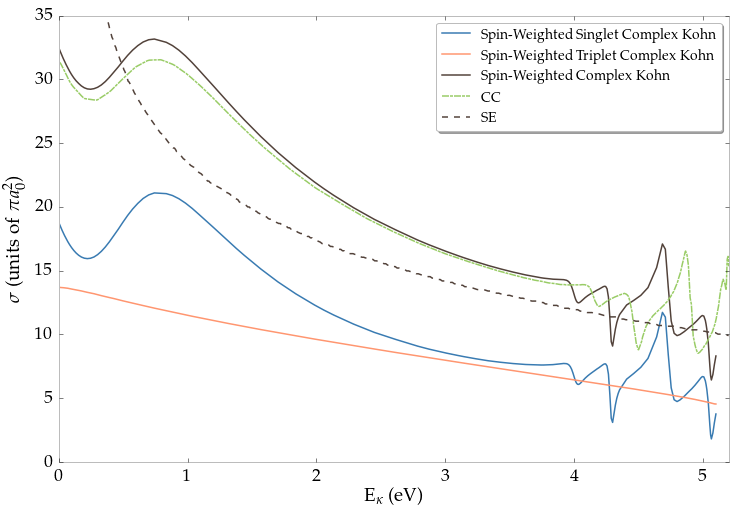

In [49]:
#df.plot(x='E', y='Cross1', marker='.', markersize=0.01, label='Spin-Weighted Singlet Complex Kohn', color=singletcolor)
#df.plot(x='E', y='Cross3', marker='.', markersize=0.01, label='Spin-Weighted Triplet Complex Kohn', color=tripletcolor)
#df.plot(x='E', y='Cross', marker='.', markersize=0.01, label='Spin-Weighted Complex Kohn', color=combinedcolor)
pyplot.plot(df['E'], df['Cross1'], marker='.', markersize=0.01, label='Spin-Weighted Singlet Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Cross3'], marker='.', markersize=0.01, label='Spin-Weighted Triplet Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Cross'], marker='.', markersize=0.01, label='Spin-Weighted Complex Kohn', color=combinedcolor)

line, = pyplot.plot(datanpt[0], datanpt[1], label='CC', color='#99CC66')
line.set_dashes([7, 1, 3, 1])  # 7 points on, 1 point off, 3 points on, 1 point off
line, = pyplot.plot(ktoE(datanpth[0]), datanpth[1]/pi, label='SE', color=combinedcolor, ls = 'dashed')
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.legend(loc='upper right', shadow=True)
pyplot.xlim([0,5.2])
pyplot.ylim([0,35])
pyplot.savefig("combined-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

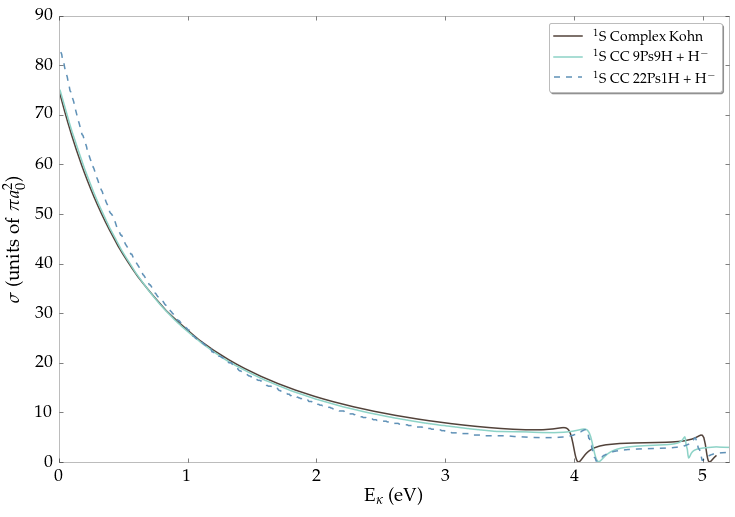

In [50]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
#df.plot(x='E', y='Cross1S', marker='.', markersize=0.01, label=r'$^1$S Complex Kohn', color=colors[0])
pyplot.plot(df['E'], df['Cross1S'], marker='.', markersize=0.01, label=r'$^1$S Complex Kohn', color=colors[0])
pyplot.plot(datawst[0], datawst[1], label=r'$^1$S CC 9Ps9H + H$^-$', color=colors[1])
pyplot.plot(BlackwoodH1SCross[0], BlackwoodH1SCross[1], label=r'$^1$S CC 22Ps1H + H$^-$', color=colors[2], ls='dashed')
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
pyplot.savefig("swave-singlet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

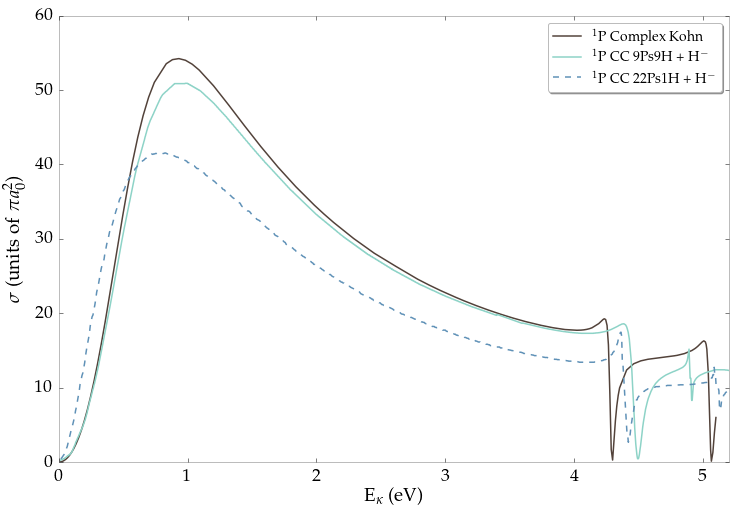

In [51]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
pyplot.plot(df['E'], df['Cross1P'], marker='.', markersize=0.01, label=r'$^1$P Complex Kohn', color=colors[0])
pyplot.plot(datawpt[0], datawpt[1], label=r'$^1$P CC 9Ps9H + H$^-$', color=colors[1])
pyplot.plot(BlackwoodH1PCross[0], BlackwoodH1PCross[1], label=r'$^1$P CC 22Ps1H + H$^-$', color=colors[2], ls='dashed')
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
pyplot.savefig("pwave-singlet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

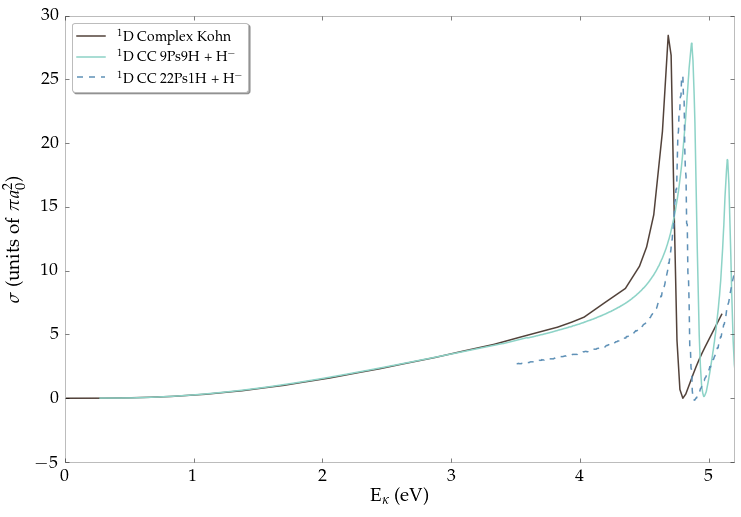

In [52]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
pyplot.plot(df['E'], df['Cross1D'], marker='.', markersize=0.01, label=r'$^1$D Complex Kohn', color=colors[0])
pyplot.plot(datawdt[0], datawdt[1], label=r'$^1$D CC 9Ps9H + H$^-$', color=colors[1])
pyplot.plot(BlackwoodH1DCross[0], BlackwoodH1DCross[1], label=r'$^1$D CC 22Ps1H + H$^-$', color=colors[2], ls='dashed')
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
pyplot.savefig("dwave-singlet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

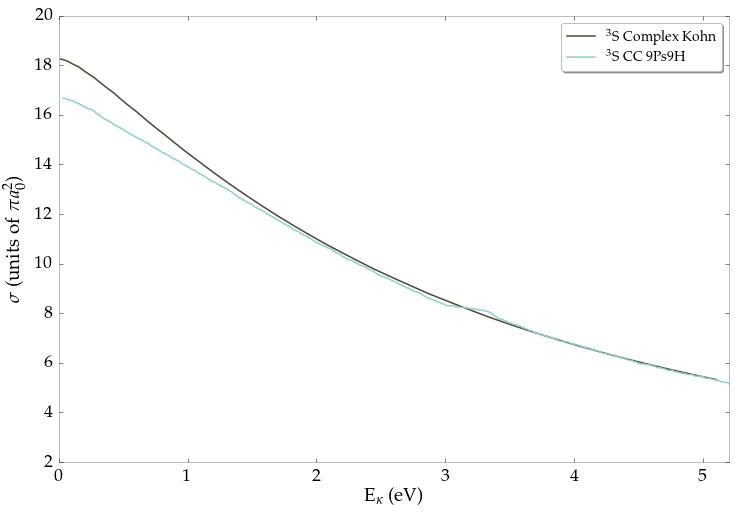

In [53]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
pyplot.plot(df['E'], df['Cross3S'], marker='.', markersize=0.01, label=r'$^3$S Complex Kohn', color=colors[0])
pyplot.plot(Walters3SCross[0], Walters3SCross[1], label=r'$^3$S CC 9Ps9H', color=colors[1])
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
pyplot.savefig("swave-triplet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

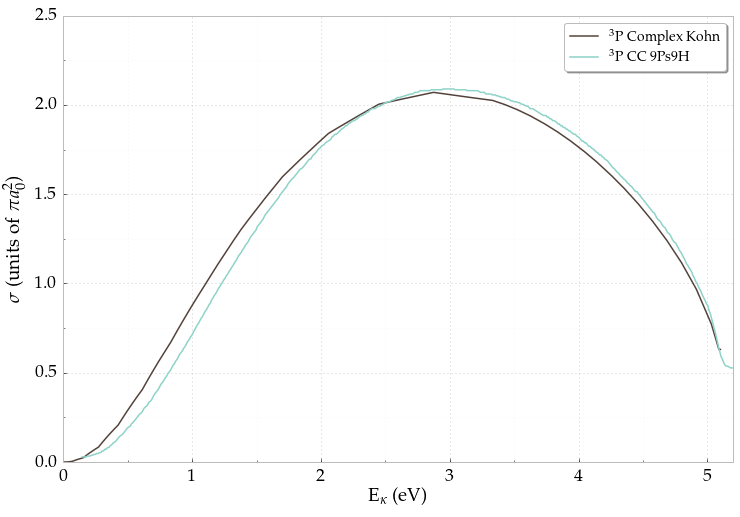

In [54]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
pyplot.plot(df['E'], df['Cross3P'], marker='.', markersize=0.01, label=r'$^3$P Complex Kohn', color=colors[0])
pyplot.plot(Walters3PCross[0], Walters3PCross[1], label=r'$^3$P CC 9Ps9H', color=colors[1])
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
FixPlot(plt)
pyplot.savefig("pwave-triplet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

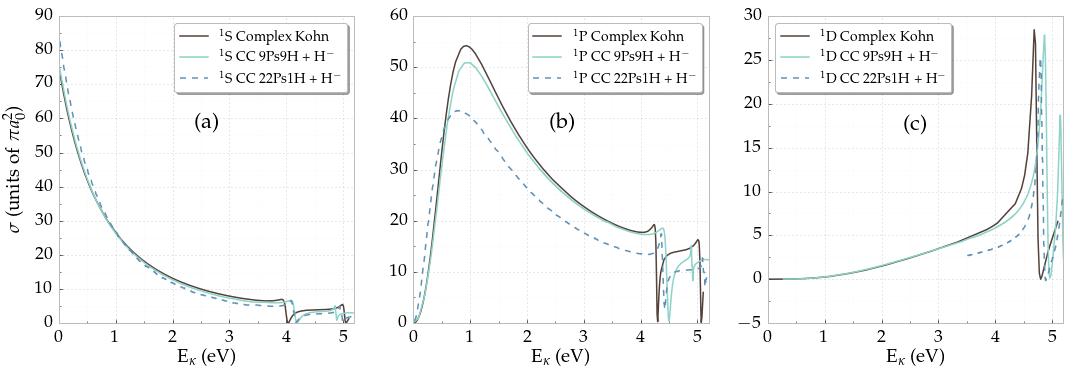

In [55]:
fig = pyplot.figure(figsize=(18, 5.5))
colors = ('#52423A', "#8dd3c7", '#5F91B7')

##########
# S-Wave #
##########
pyplot.subplot(1, 3, 1)

pyplot.plot(df['E'], df['Cross1S'], marker='.', markersize=0.01, label=r'$^1$S Complex Kohn', color=colors[0])
pyplot.plot(datawst[0], datawst[1], label=r'$^1$S CC 9Ps9H + H$^-$', color=colors[1])
pyplot.plot(BlackwoodH1SCross[0], BlackwoodH1SCross[1], label=r'$^1$S CC 22Ps1H + H$^-$', color=colors[2], ls='dashed')
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
ax = plt.gca()
ax.text(2.4, 57, '(a)', fontsize=22)
FixPlot(plt)

##########
# P-Wave #
##########
pyplot.subplot(1, 3, 2)

pyplot.plot(df['E'], df['Cross1P'], marker='.', markersize=0.01, label=r'$^1$P Complex Kohn', color=colors[0])
pyplot.plot(datawpt[0], datawpt[1], label=r'$^1$P CC 9Ps9H + H$^-$', color=colors[1])
pyplot.plot(BlackwoodH1PCross[0], BlackwoodH1PCross[1], label=r'$^1$P CC 22Ps1H + H$^-$', color=colors[2], ls='dashed')
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.xlim([0,5.2])
ax = plt.gca()
ax.text(2.4, 38, '(b)', fontsize=22)
FixPlot(plt)

##########
# D-Wave #
##########
pyplot.subplot(1, 3, 3)

pyplot.plot(df['E'], df['Cross1D'], marker='.', markersize=0.01, label=r'$^1$D Complex Kohn', color=colors[0])
pyplot.plot(datawdt[0], datawdt[1], label=r'$^1$D CC 9Ps9H + H$^-$', color=colors[1])
pyplot.plot(BlackwoodH1DCross[0], BlackwoodH1DCross[1], label=r'$^1$D CC 22Ps1H + H$^-$', color=colors[2], ls='dashed')
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.xlim([0,5.2])
ax = plt.gca()
ax.text(2.4, 17, '(c)', fontsize=22)
FixPlot(plt)

pyplot.savefig("spd-singlet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

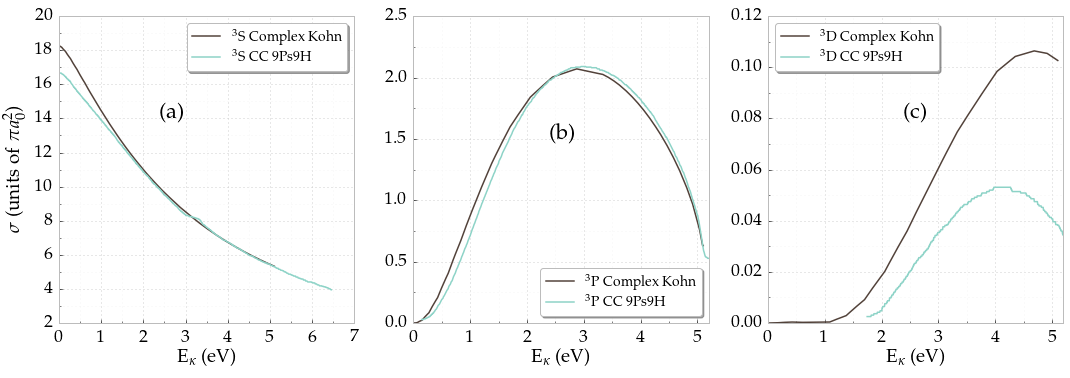

In [56]:
fig = pyplot.figure(figsize=(18, 5.5))
colors = ('#52423A', "#8dd3c7", '#5F91B7')

##########
# S-Wave #
##########
pyplot.subplot(1, 3, 1)

pyplot.plot(df['E'], df['Cross3S'], marker='.', markersize=0.01, label=r'$^3$S Complex Kohn', color=colors[0])
pyplot.plot(Walters3SCross[0], Walters3SCross[1], label=r'$^3$S CC 9Ps9H', color=colors[1])
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
ax = plt.gca()
ax.text(2.4, 14, '(a)', fontsize=22)
FixPlot(plt)
#pyplot.xlim([0,5.2])

##########
# P-Wave #
##########
pyplot.subplot(1, 3, 2)

pyplot.plot(df['E'], df['Cross3P'], marker='.', markersize=0.01, label=r'$^3$P Complex Kohn', color=colors[0])
pyplot.plot(Walters3PCross[0], Walters3PCross[1], label=r'$^3$P CC 9Ps9H', color=colors[1])
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
#pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
ax = plt.gca()
ax.text(2.4, 1.5, '(b)', fontsize=22)
FixPlot(plt)


##########
# D-Wave #
##########
pyplot.subplot(1, 3, 3)

pyplot.plot(df['E'], df['Cross3D'], marker='.', markersize=0.01, label=r'$^3$D Complex Kohn', color=colors[0])
pyplot.plot(Walters3DCross[0], Walters3DCross[1], label=r'$^3$D CC 9Ps9H', color=colors[1])
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
#pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
ax = plt.gca()
ax.text(2.4, 0.08, '(c)', fontsize=22)
FixPlot(plt)

pyplot.savefig("spd-triplet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

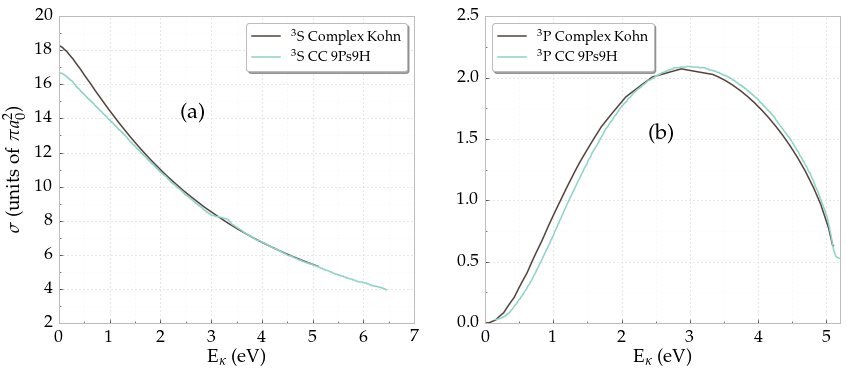

In [57]:
fig = pyplot.figure(figsize=(14, 5.5))
colors = ('#52423A', "#8dd3c7", '#5F91B7')

##########
# S-Wave #
##########
pyplot.subplot(1, 2, 1)

pyplot.plot(df['E'], df['Cross3S'], marker='.', markersize=0.01, label=r'$^3$S Complex Kohn', color=colors[0])
pyplot.plot(Walters3SCross[0], Walters3SCross[1], label=r'$^3$S CC 9Ps9H', color=colors[1])
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
ax = plt.gca()
ax.text(2.4, 14, '(a)', fontsize=22)
FixPlot(plt)
#pyplot.xlim([0,5.2])

##########
# P-Wave #
##########
pyplot.subplot(1, 2, 2)

pyplot.plot(df['E'], df['Cross3P'], marker='.', markersize=0.01, label=r'$^3$P Complex Kohn', color=colors[0])
pyplot.plot(Walters3PCross[0], Walters3PCross[1], label=r'$^3$P CC 9Ps9H', color=colors[1])
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
#pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
ax = plt.gca()
ax.text(2.4, 1.5, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig("sp-triplet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

### Born Approximation Cross Sections

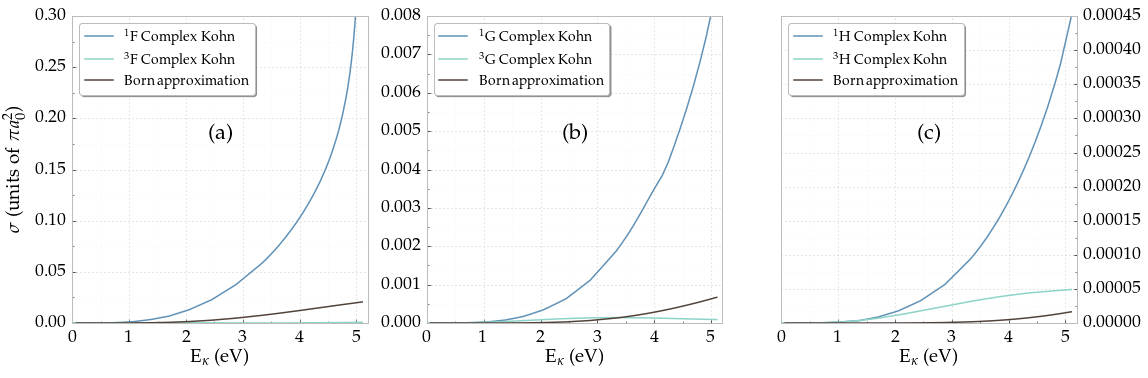

In [58]:
fig = pyplot.figure(figsize=(18, 5.5))
colors = ('#52423A', "#8dd3c7", '#5F91B7')

##########
# F-Wave #
##########
pyplot.subplot(1, 3, 1)

pyplot.plot(df['E'], CrossSection(df['Kappa'], df['Phase1F'], 1), label=r'$^1$F Complex Kohn', color=colors[2])
pyplot.plot(df['E'], CrossSection(df['Kappa'], df['Phase3F'], 1), label=r'$^3$F Complex Kohn', color=colors[1])
pyplot.plot(E1F, CrossSection(kappa1F, sls1F, 1), label=r'Born approximation', color=colors[0])
pyplot.legend(loc='upper left', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
pyplot.ylim([0,0.3])
ax = plt.gca()
ax.text(2.4, 0.18, '(a)', fontsize=22)
FixPlot(plt)

##########
# G-Wave #
##########
pyplot.subplot(1, 3, 2)

pyplot.plot(df['E'], CrossSection(df['Kappa'], df['Phase1G'], 1), label=r'$^1$G Complex Kohn', color=colors[2])
pyplot.plot(df['E'], CrossSection(df['Kappa'], df['Phase3G'], 1), label=r'$^3$G Complex Kohn', color=colors[1])
pyplot.plot(E1G, CrossSection(kappa1G, sls1G, 1), label=r'Born approximation', color=colors[0])
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
#pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
pyplot.ylim([0,0.008])
ax = plt.gca()
ax.text(2.4, 0.0048, '(b)', fontsize=22)
FixPlot(plt)


##########
# H-Wave #
##########
pyplot.subplot(1, 3, 3)

pyplot.plot(df['E'], CrossSection(df['Kappa'], df['Phase1H'], 1), label=r'$^1$H Complex Kohn', color=colors[2])
pyplot.plot(df['E'], CrossSection(df['Kappa'], df['Phase3H'], 1), label=r'$^3$H Complex Kohn', color=colors[1])
pyplot.plot(E1H, CrossSection(kappa1H, sls1H, 1), label=r'Born approximation', color=colors[0])
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
#pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
ax = plt.gca()
ax.text(2.4, 0.00027, '(c)', fontsize=22)
FixPlot(plt)
ax.yaxis.tick_right()

pyplot.savefig("fgh-born-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

### Maximum Percentage for $\sigma$

In [59]:
print "Maximum percent contributions"
print "S-wave: ", ((1/4.0*df['Cross1S'].values + 3/4.0*df['Cross3S'].values) / df['Cross'].values * 100).max()
print "P-wave: ", ((1/4.0*df['Cross1P'].values + 3/4.0*df['Cross3P'].values) / df['Cross'].values * 100).max()
print "D-wave: ", ((1/4.0*df['Cross1D'].values + 3/4.0*df['Cross3D'].values) / df['Cross'].values * 100).max()
print "F-wave: ", ((1/4.0*df['Cross1F'].values + 3/4.0*df['Cross3F'].values) / df['Cross'].values * 100).max()
print "G-wave: ", ((1/4.0*df['Cross1G'].values + 3/4.0*df['Cross3G'].values) / df['Cross'].values * 100).max()
print "H-wave: ", ((1/4.0*df['Cross1H'].values + 3/4.0*df['Cross3H'].values) / df['Cross'].values * 100).max()
print
print "Average percent contributions"
print "S-wave: ", ((1/4.0*df['Cross1S'].values + 3/4.0*df['Cross3S'].values) / df['Cross'].values * 100).mean()
print "P-wave: ", ((1/4.0*df['Cross1P'].values + 3/4.0*df['Cross3P'].values) / df['Cross'].values * 100).mean()
print "D-wave: ", ((1/4.0*df['Cross1D'].values + 3/4.0*df['Cross3D'].values) / df['Cross'].values * 100).mean()
print "F-wave: ", ((1/4.0*df['Cross1F'].values + 3/4.0*df['Cross3F'].values) / df['Cross'].values * 100).mean()
print "G-wave: ", ((1/4.0*df['Cross1G'].values + 3/4.0*df['Cross3G'].values) / df['Cross'].values * 100).mean()
print "H-wave: ", ((1/4.0*df['Cross1H'].values + 3/4.0*df['Cross3H'].values) / df['Cross'].values * 100).mean()

Maximum percent contributions
S-wave:  99.9999999959
P-wave:  45.9662265103
D-wave:  42.073633733
F-wave:  3.78197079124
G-wave:  0.102559853068
H-wave:  0.00830837867752

Average percent contributions
S-wave:  60.609110023
P-wave:  30.2063348269
D-wave:  8.56469825449
F-wave:  0.595928862658
G-wave:  0.022009307054
H-wave:  0.00191872588722


In [60]:
print "Maximum percent contributions"
print "S-wave singlet: ", ((1/4.0*df['Cross1S'].values) / df['Cross'].values * 100).max()
print "S-wave triplet: ", ((1/4.0*df['Cross3S'].values) / df['Cross'].values * 100).max()
print "P-wave singlet: ", ((1/4.0*df['Cross1P'].values) / df['Cross'].values * 100).max()
print "P-wave triplet: ", ((1/4.0*df['Cross3P'].values) / df['Cross'].values * 100).max()
print "D-wave singlet: ", ((1/4.0*df['Cross1D'].values) / df['Cross'].values * 100).max()
print "D-wave triplet: ", ((1/4.0*df['Cross3D'].values) / df['Cross'].values * 100).max()
print "F-wave singlet: ", ((1/4.0*df['Cross1F'].values) / df['Cross'].values * 100).max()
print "F-wave triplet: ", ((1/4.0*df['Cross3F'].values) / df['Cross'].values * 100).max()
print "G-wave singlet: ", ((1/4.0*df['Cross1G'].values) / df['Cross'].values * 100).max()
print "G-wave triplet: ", ((1/4.0*df['Cross3G'].values) / df['Cross'].values * 100).max()
print "H-wave singlet: ", ((1/4.0*df['Cross1H'].values) / df['Cross'].values * 100).max()
print "H-wave triplet: ", ((1/4.0*df['Cross3H'].values) / df['Cross'].values * 100).max()
print
print "Average percent contributions"
print "S-wave singlet: ", ((1/4.0*df['Cross1S'].values) / df['Cross'].values * 100).mean()
print "S-wave triplet: ", ((1/4.0*df['Cross3S'].values) / df['Cross'].values * 100).mean()
print "P-wave singlet: ", ((1/4.0*df['Cross1P'].values) / df['Cross'].values * 100).mean()
print "P-wave triplet: ", ((1/4.0*df['Cross3P'].values) / df['Cross'].values * 100).mean()
print "D-wave singlet: ", ((1/4.0*df['Cross1D'].values) / df['Cross'].values * 100).mean()
print "D-wave triplet: ", ((1/4.0*df['Cross3D'].values) / df['Cross'].values * 100).mean()
print "F-wave singlet: ", ((1/4.0*df['Cross1F'].values) / df['Cross'].values * 100).mean()
print "F-wave triplet: ", ((1/4.0*df['Cross3F'].values) / df['Cross'].values * 100).mean()
print "G-wave singlet: ", ((1/4.0*df['Cross1G'].values) / df['Cross'].values * 100).mean()
print "G-wave triplet: ", ((1/4.0*df['Cross3G'].values) / df['Cross'].values * 100).mean()
print "H-wave singlet: ", ((1/4.0*df['Cross1H'].values) / df['Cross'].values * 100).mean()
print "H-wave triplet: ", ((1/4.0*df['Cross3H'].values) / df['Cross'].values * 100).mean()

Maximum percent contributions
S-wave singlet:  57.7972682266
S-wave triplet:  20.860429937
P-wave singlet:  42.8928655744
P-wave triplet:  4.32333456366
D-wave singlet:  41.6068721709
D-wave triplet:  0.400941742786
F-wave singlet:  3.76475029506
F-wave triplet:  0.00606311843033
G-wave singlet:  0.0993817632153
G-wave triplet:  0.00105936328414
H-wave singlet:  0.00621586891732
H-wave triplet:  0.000697503253402

Average percent contributions
S-wave singlet:  20.7909340148
S-wave triplet:  13.2727253361
P-wave singlet:  24.3641692334
P-wave triplet:  1.94738853117
D-wave singlet:  8.17847989538
D-wave triplet:  0.128739453037
F-wave singlet:  0.592569807165
F-wave triplet:  0.00111968516428
G-wave singlet:  0.0206176990563
G-wave triplet:  0.000463869332581
H-wave singlet:  0.00129506316064
H-wave triplet:  0.000207887575528


### Percentage Contributions to the Total Cross Section

In [61]:
# This selects the subset of the cross section lists for only the values of kappa listed.
points1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
contrib1S = GetSubset(df['Kappa'], points1, df['Cross1S'])
contrib1P = GetSubset(df['Kappa'], points1, df['Cross1P'])
contrib1D = GetSubset(df['Kappa'], points1, df['Cross1D'])
contrib1F = GetSubset(df['Kappa'], points1, df['Cross1F'])
contrib1G = GetSubset(df['Kappa'], points1, df['Cross1G'])
contrib1H = GetSubset(df['Kappa'], points1, df['Cross1H'])
contrib1_tot = GetSubset(df['Kappa'], points1, df['Cross1']) * 4

# Find the percentages
percent1S = contrib1S / contrib1_tot * 100
percent1P = contrib1P / contrib1_tot * 100
percent1D = contrib1D / contrib1_tot * 100
percent1F = contrib1F / contrib1_tot * 100
percent1G = contrib1G / contrib1_tot * 100
percent1H = contrib1H / contrib1_tot * 100

In [62]:
# This selects the subset of the cross section lists for only the values of kappa listed.
points3 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
contrib3S = GetSubset(df['Kappa'], points3, df['Cross3S'])
contrib3P = GetSubset(df['Kappa'], points3, df['Cross3P'])
contrib3D = GetSubset(df['Kappa'], points3, df['Cross3D'])
contrib3F = GetSubset(df['Kappa'], points3, df['Cross3F'])
contrib3G = GetSubset(df['Kappa'], points3, df['Cross3G'])
contrib3H = GetSubset(df['Kappa'], points3, df['Cross3H'])
contrib3_tot = GetSubset(df['Kappa'], points3, df['Cross3']) * 4 / 3.0

# Find the percentages
percent3S = contrib3S / contrib3_tot * 100
percent3P = contrib3P / contrib3_tot * 100
percent3D = contrib3D / contrib3_tot * 100
percent3F = contrib3F / contrib3_tot * 100
percent3G = contrib3G / contrib3_tot * 100
percent3H = contrib3H / contrib3_tot * 100

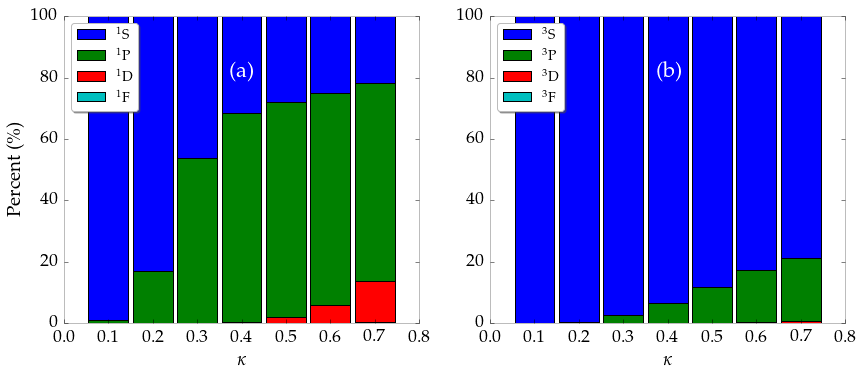

In [63]:
fig = pyplot.figure(figsize=(14, 5.5))

###########
# Singlet #
###########
pyplot.subplot(1, 2, 1)
pyplot.xlabel(r"$\kappa$")
pyplot.ylabel(r"Percent (\%)")
pyplot.bar(np.array(points1)-0.045, percent1S, 0.09, color='b', bottom=percent1F+percent1D+percent1P, label='$^1$S')
pyplot.bar(np.array(points1)-0.045, percent1P, 0.09, color='g', bottom=percent1F+percent1D, label='$^1$P')
pyplot.bar(np.array(points1)-0.045, percent1D, 0.09, color='r', bottom=percent1F, label='$^1$D')
pyplot.bar(np.array(points1)-0.045, percent1F, 0.09, color='c', label='$^1$F')
pyplot.ylim([0,100])
pyplot.legend(loc='upper left', shadow=True)
ax = plt.gca()
ax.text(0.375, 80, '(a)', fontsize=22, color='white')

###########
# Triplet #
###########
pyplot.subplot(1, 2, 2)
pyplot.xlabel(r"$\kappa$")
pyplot.bar(np.array(points3)-0.045, percent3S, 0.09, color='b', bottom=percent3F+percent3D+percent3P, label='$^3$S')
pyplot.bar(np.array(points3)-0.045, percent3P, 0.09, color='g', bottom=percent3F+percent3D, label='$^3$P')
pyplot.bar(np.array(points3)-0.045, percent3D, 0.09, color='r', bottom=percent3F, label='$^3$D')
pyplot.bar(np.array(points3)-0.045, percent3F, 0.09, color='c', label='$^3$F')
pyplot.ylim([0,100])
pyplot.legend(loc='upper left', shadow=True)
ax = plt.gca()
ax.text(0.375, 80, '(b)', fontsize=22, color='white')

pyplot.savefig("percentage-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

In [64]:
percent1SFull = (0.25 * df['Cross1S'] / df['Cross1'] * 100).tolist()
percent1PFull = (0.25 * df['Cross1P'] / df['Cross1'] * 100).tolist()
percent1DFull = (0.25 * df['Cross1D'] / df['Cross1'] * 100).tolist()
percent1FFull = (0.25 * df['Cross1F'] / df['Cross1'] * 100).tolist()

percent3SFull = (0.75 * df['Cross3S'] / df['Cross3'] * 100).tolist()
percent3PFull = (0.75 * df['Cross3P'] / df['Cross3'] * 100).tolist()
percent3DFull = (0.75 * df['Cross3D'] / df['Cross3'] * 100).tolist()
percent3FFull = (0.75 * df['Cross3F'] / df['Cross3'] * 100).tolist()

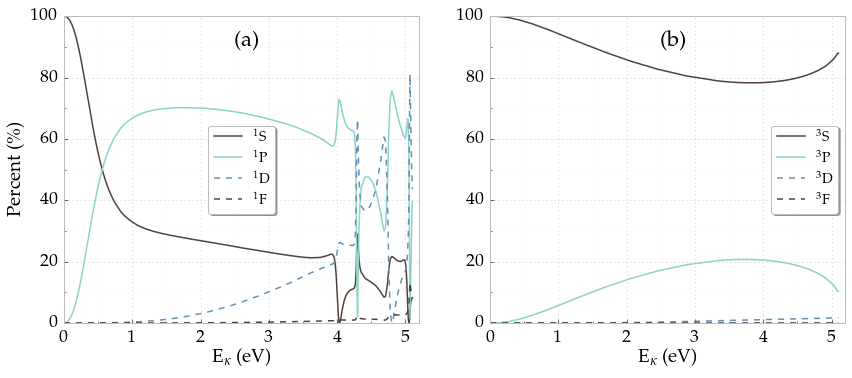

In [65]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
fig = pyplot.figure(figsize=(14, 5.5))

###########
# Singlet #
###########
pyplot.subplot(1, 2, 1)
pyplot.plot(df['E'], percent1SFull, marker='.', markersize=0.01, label=r'$^1$S', color=colors[0])
pyplot.plot(df['E'], percent1PFull, marker='.', markersize=0.01, label=r'$^1$P', color=colors[1])
pyplot.plot(df['E'], percent1DFull, marker='.', markersize=0.01, label=r'$^1$D', color=colors[2], ls='dashed')
pyplot.plot(df['E'], percent1FFull, marker='.', markersize=0.01, label=r'$^1$F', color=colors[0], ls='dashed')
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"Percent (\%)")
pyplot.xlim([0,5.2])
ax = plt.gca()
ax.text(2.5, 90, '(a)', fontsize=22)
FixPlot(plt)

###########
# Triplet #
###########
pyplot.subplot(1, 2, 2)
pyplot.plot(df['E'], percent3SFull, marker='.', markersize=0.01, label=r'$^3$S', color=colors[0])
pyplot.plot(df['E'], percent3PFull, marker='.', markersize=0.01, label=r'$^3$P', color=colors[1])
pyplot.plot(df['E'], percent3DFull, marker='.', markersize=0.01, label=r'$^3$D', color=colors[2], ls='dashed')
pyplot.plot(df['E'], percent3FFull, marker='.', markersize=0.01, label=r'$^3$F', color=colors[0], ls='dashed')
pyplot.legend(loc='best', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.xlim([0,5.2])
ax = plt.gca()
ax.text(2.5, 90, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig("percentage-cross-sections-full.pdf", bbox_inches='tight')
pyplot.show()

## Differential Cross Sections

See "Differential Cross Sections.ipynb"

## Scattering Amplitude

See "Differential Cross Sections.ipynb"

## Momentum Transfer Cross Sections

In [66]:
def PercentDiff(a, b):
    return abs((a-b)/(a+b)*2) * 100

In [67]:
# Singlet
interp_phasec1S = np.array(df['Phase1S'].tolist())
interp_phasec1P = np.array(df['Phase1P'].tolist())
interp_phasec1D = np.array(df['Phase1D'].tolist())
interp_phasec1F = np.array(df['Phase1F'].tolist())
interp_phasec1G = np.array(df['Phase1G'].tolist())
interp_phasec1H = np.array(df['Phase1H'].tolist())
interp_phase1 = [interp_phasec1S, interp_phasec1P, interp_phasec1D, interp_phasec1F, interp_phasec1G, interp_phasec1H]
# Triplet
interp_phasec3S = np.array(df['Phase3S'].tolist())
interp_phasec3P = np.array(df['Phase3P'].tolist())
interp_phasec3D = np.array(df['Phase3D'].tolist())
interp_phasec3F = np.array(df['Phase3F'].tolist())
interp_phasec3G = np.array(df['Phase3G'].tolist())
interp_phasec3H = np.array(df['Phase3H'].tolist())
interp_phase3 = [interp_phasec3S, interp_phasec3P, interp_phasec3D, interp_phasec3F, interp_phasec3G, interp_phasec3H]
# Energy and momentum values used
kappasub = np.array(df['Kappa'].tolist())
Esub = np.array(df['E'].tolist())
minK = df['Kappa'].min()
maxK = df['Kappa'].max()

In [68]:
lmax = 5  # Through the H-wave

mom_arrays = []
mom_cross1 = []
mom_cross3 = []
for lm in range(lmax+1):
    mom_cross = []
    for i in range(np.size(kappasub)):
        k = kappasub[i]
        m1 = 0
        m3 = 0
        for l in range(lm):
            m1 += 4 / k**2 * (l+1) * (sin(interp_phase1[l][i] - interp_phase1[l+1][i]))**2
            m3 += 4 / k**2 * (l+1) * (sin(interp_phase3[l][i] - interp_phase3[l+1][i]))**2
        mom_cross1 = np.append(mom_cross1, 0.25*m1)
        mom_cross3 = np.append(mom_cross3, 0.75*m3)
        mom_cross = np.append(mom_cross, 0.25*m1 + 0.75*m3)
    mom_arrays.append(mom_cross)

In [69]:
print "Maximum percent differences"
print "P-wave: ", PercentDiff(mom_arrays[0], mom_arrays[1]).max()
print "D-wave: ", PercentDiff(mom_arrays[1], mom_arrays[2]).max()
print "F-wave: ", PercentDiff(mom_arrays[2], mom_arrays[3]).max()
print "G-wave: ", PercentDiff(mom_arrays[3], mom_arrays[4]).max()
print "H-wave: ", PercentDiff(mom_arrays[4], mom_arrays[5]).max()
print
print "Average percent differences"
print "P-wave: ", PercentDiff(mom_arrays[0], mom_arrays[1]).mean()
print "D-wave: ", PercentDiff(mom_arrays[1], mom_arrays[2]).mean()
print "F-wave: ", PercentDiff(mom_arrays[2], mom_arrays[3]).mean()
print "G-wave: ", PercentDiff(mom_arrays[3], mom_arrays[4]).mean()
print "H-wave: ", PercentDiff(mom_arrays[4], mom_arrays[5]).mean()

Maximum percent differences
P-wave:  200.0
D-wave:  62.3903937533
F-wave:  61.2052078462
G-wave:  2.94132096328
H-wave:  0.0470258777789

Average percent differences
P-wave:  200.0
D-wave:  30.06283789
F-wave:  6.81795734878
G-wave:  0.378372673414
H-wave:  0.0110583060432


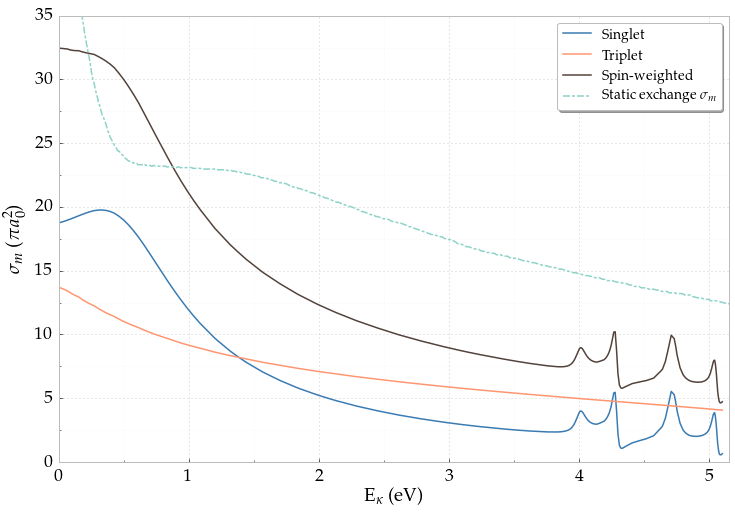

In [70]:
plotcol = (singletcolor, tripletcolor, '#52423A')
plotsty = ('-', '-', ':')

lmax = 5  # Through the H-wave

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma_m$ ($\pi a_0^2$)")

mom_cross1 = []
mom_cross3 = []
mom_cross = []
for i in range(np.size(kappasub)):
    k = kappasub[i]
    m1 = 0
    m3 = 0
    for l in range(lmax):
        m1 += 4 / k**2 * (l+1) * (sin(interp_phase1[l][i] - interp_phase1[l+1][i]))**2
        m3 += 4 / k**2 * (l+1) * (sin(interp_phase3[l][i] - interp_phase3[l+1][i]))**2
    mom_cross1 = np.append(mom_cross1, 0.25*m1)
    mom_cross3 = np.append(mom_cross3, 0.75*m3)
    mom_cross = np.append(mom_cross, 0.25*m1 + 0.75*m3)
pyplot.plot(ktoE(kappasub), mom_cross1, plotsty[0], marker='.', markersize=0.01, label=r"Singlet", color=plotcol[0])
pyplot.plot(ktoE(kappasub), mom_cross3, plotsty[1], marker='.', markersize=0.01, label=r"Triplet", color=plotcol[1])
pyplot.plot(ktoE(kappasub), mom_cross, plotsty[1], marker='.', markersize=0.01, label=r"Spin-weighted", color=plotcol[2])

line, = pyplot.plot(ktoE(datanpthc[0]), datanpthc[1]/pi, label=r'Static exchange $\sigma_{m}$', color=colors[1])  #, ls = 'dashed'
line.set_dashes([7, 2, 3, 2])  # 7 points on, 1 point off, 3 points on, 1 point off

pyplot.legend()
pyplot.xlim([0,5.15])
pyplot.ylim([0,35])
FixPlot(plt)
pyplot.savefig("momentum-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

## Ortho-Para Conversion Cross Sections

In [71]:
lmax = 5  # Through the H-wave

oparrays = []
for lm in range(lmax+1):
    op_cross = []
    for i in range(np.size(kappasub)):
        k = kappasub[i]
        op = 0
        for l in range(lm+1):
            op += 1 / (4*k**2) * (2*l+1) * (sin(interp_phase1[l][i] - interp_phase3[l][i]))**2
        op_cross = np.append(op_cross, op)
    oparrays.append(op_cross)

In [72]:
print "Maximum percent differences"
print "P-wave: ", PercentDiff(oparrays[0], oparrays[1]).max()
print "D-wave: ", PercentDiff(oparrays[1], oparrays[2]).max()
print "F-wave: ", PercentDiff(oparrays[2], oparrays[3]).max()
print "G-wave: ", PercentDiff(oparrays[3], oparrays[4]).max()
print "H-wave: ", PercentDiff(oparrays[4], oparrays[5]).max()
print
print "Average percent differences"
print "P-wave: ", PercentDiff(oparrays[0], oparrays[1]).mean()
print "D-wave: ", PercentDiff(oparrays[1], oparrays[2]).mean()
print "F-wave: ", PercentDiff(oparrays[2], oparrays[3]).mean()
print "G-wave: ", PercentDiff(oparrays[3], oparrays[4]).mean()
print "H-wave: ", PercentDiff(oparrays[4], oparrays[5]).mean()

Maximum percent differences
P-wave:  199.971147159
D-wave:  121.500254618
F-wave:  7.9357329006
G-wave:  0.150783447179
H-wave:  0.00517702616801

Average percent differences
P-wave:  117.202412068
D-wave:  21.4827012396
F-wave:  1.17844100285
G-wave:  0.0277090591561
H-wave:  0.000872472587576


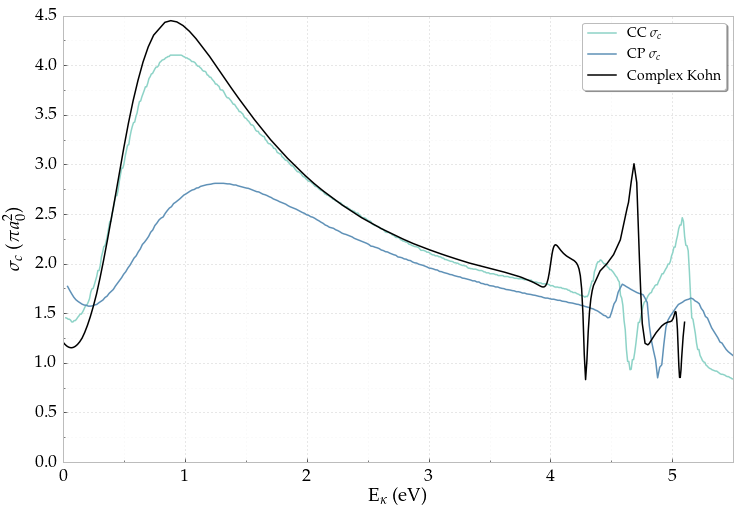

In [73]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
plotsty = ('-', '-', ':')

lmax = 5  # Through the H-wave

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma_c$ ($\pi a_0^2$)")

op_cross = []
for i in range(np.size(kappasub)):
    k = kappasub[i]
    op = 0
    for l in range(lmax+1):
        op += 1 / (4*k**2) * (2*l+1) * (sin(interp_phase1[l][i] - interp_phase3[l][i]))**2
    op_cross = np.append(op_cross, op)

pyplot.plot(datanptbc[0], datanptbc[1], label=r'CC $\sigma_{c}$', color=colors[1])  #, ls = 'dashed'
pyplot.plot(datanptc[0], datanptc[1], label=r'CP $\sigma_{c}$', color=colors[2])  #, ls = 'dashed'
pyplot.plot(ktoE(kappasub), op_cross, '-', marker='.', label=r'Complex Kohn', markersize=0.01, color='black')

pyplot.legend()
pyplot.xlim([0,5.5])
FixPlot(plt)
pyplot.savefig("orthopara-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

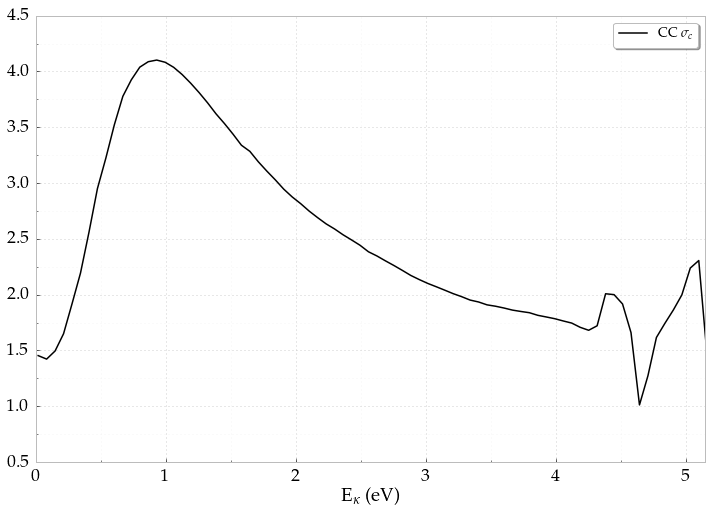

In [74]:
from scipy.interpolate import spline

x = datanptbc[0]
y = datanptbc[1]

f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(x.min(), x.max(), 100)

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.plot(xnew, f2(xnew), label=r'CC $\sigma_{c}$', color='black')

pyplot.legend()
pyplot.xlim([0,5.15])
FixPlot(plt)
pyplot.show()

In [105]:
datanphrat = numpy.loadtxt('Biswas - OrthoParaRatio.csv', dtype=float, delimiter=',')
datanpthrat = np.transpose(datanphrat)
datanprrat = numpy.loadtxt('Ray - OrthoParaRatio.csv', dtype=float, delimiter=',')
datanptrrat = np.transpose(datanprrat)

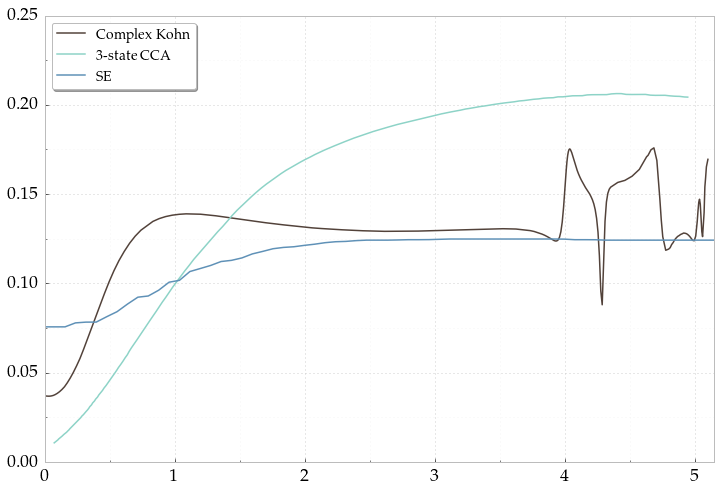

In [106]:
pyplot.plot(df['E'], op_cross / df['Cross'], label=r'Complex Kohn', color=colors[0])
pyplot.plot(datanpthrat[0], datanpthrat[1], label=r'3-state CCA', color=colors[1])
pyplot.plot(datanptrrat[0], datanptrrat[1], label=r'SE', color=colors[2])
pyplot.xlim([0,5.15])
#pyplot.yscale('log')
#pyplot.ylim([3e-2,0.2])
pyplot.legend(loc='upper left', shadow=True)
FixPlot(plt)
pyplot.savefig("ortho-para-ratio.pdf", bbox_inches='tight')
pyplot.show()

## Combined Cross Sections

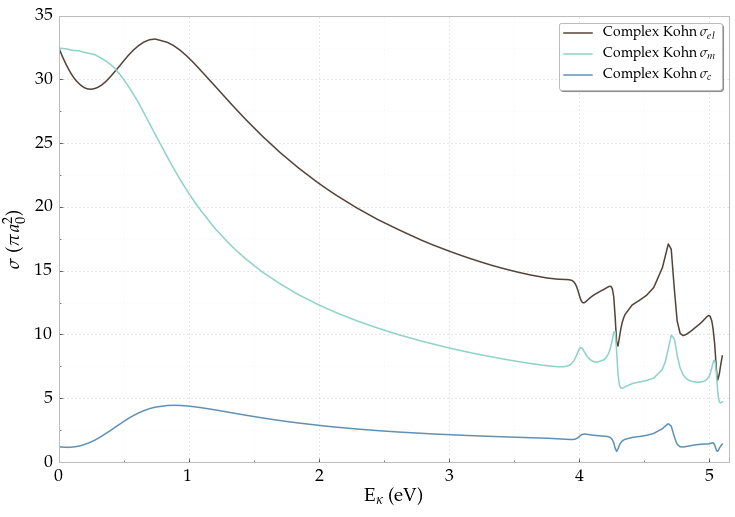

In [75]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')

pyplot.plot(df['E'], df['Cross'], marker='.', markersize=0.01, label=r'Complex Kohn $\sigma_{el}$', color=colors[0])
pyplot.plot(ktoE(kappasub), mom_cross, plotsty[1], marker='.', markersize=0.01, label=r'Complex Kohn $\sigma_{m}$', color=colors[1])
pyplot.plot(ktoE(kappasub), op_cross, '-', marker='.', markersize=0.01, label=r'Complex Kohn $\sigma_{c}$', color=colors[2])

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ ($\pi a_0^2$)")

pyplot.legend()
pyplot.xlim([0,5.15])
pyplot.ylim([0,35])
FixPlot(plt)
pyplot.savefig("cross-section-comparisons.pdf", bbox_inches='tight')
pyplot.show()

In [150]:
# Determining where $\sigma_{el} > \sigma_m$
print df['E'][45:50]
print df['Kappa'][45:50]
print df['Cross'].tolist()[45:50] - mom_cross[45:50]
df['Cross'].tolist()[45:50], mom_cross[45:50]

45    0.425178
46    0.459872
47    0.495927
48    0.533343
49    0.572119
Name: E, dtype: float64
45    0.25
46    0.26
47    0.27
48    0.28
49    0.29
Name: Kappa, dtype: float64
[-0.36151582  0.47167732  1.4087806   2.41143003  3.44408799]


([30.562002281804691,
  30.971507141652381,
  31.429809532845788,
  31.881919368362539,
  32.294494114367254],
 array([ 30.9235181 ,  30.49982982,  30.02102894,  29.47048934,  28.85040612]))

## False Triplet Resonance

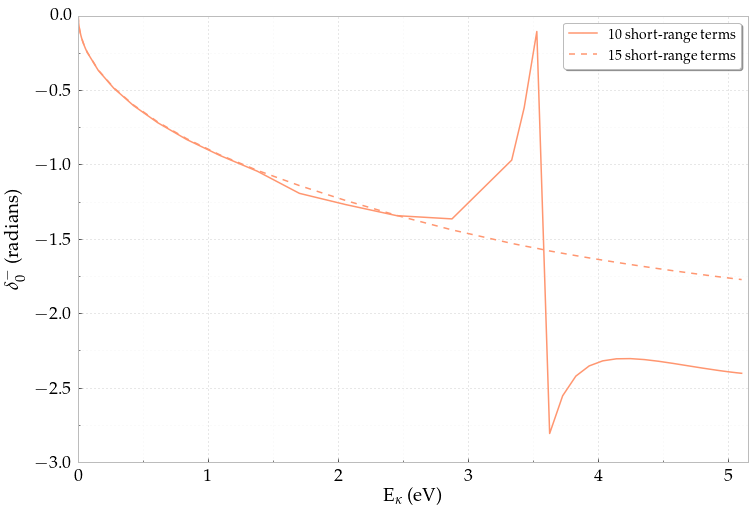

In [76]:
kappa3Ssmall10, E3Ssmall10, phase3Ssmall10, cross3Ssmall10 = GetPhaseShifts(cursor, entries3S, 10, 0, kohnmethod)
kappa3Ssmall15, E3Ssmall15, phase3Ssmall15, cross3Ssmall15 = GetPhaseShifts(cursor, entries3S, 15, 0, kohnmethod)

fig = pyplot.figure()
pyplot.plot(E3Ssmall10, phase3Ssmall10, marker='.', markersize=0.01, color=tripletcolor, label='10 short-range terms')
pyplot.plot(E3Ssmall15, phase3Ssmall15, marker='.', markersize=0.01, ls='dashed', color=tripletcolor, label='15 short-range terms')
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\delta_0^-$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("triplet-false-resonance.pdf", bbox_inches='tight')
pyplot.show()

## Divergence Plot

In [77]:
smat  = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'smatrix')
gen01 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen01')
gen02 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen02')
gen03 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen03')
gen04 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen04')
gen05 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen05')

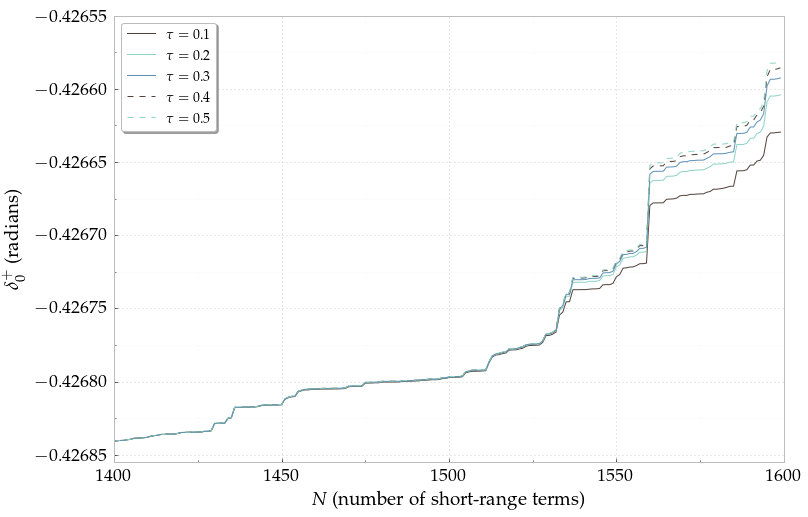

In [78]:
colors = ('#52423A', '#8dd3c7', '#5F91B7')
terms = np.array(range(1400,1600))
#pyplot.plot(terms,  smat[1400:1600], lw=1, label=r'S-matrix')
pyplot.plot(terms, gen01[1400:1600], lw=1, label=r'$\tau = 0.1$', ls='solid', color=colors[0])
pyplot.plot(terms, gen02[1400:1600], lw=1, label=r'$\tau = 0.2$', ls='solid', color=colors[1])
pyplot.plot(terms, gen03[1400:1600], lw=1, label=r'$\tau = 0.3$', ls='solid', color=colors[2])
pyplot.plot(terms, gen04[1400:1600], lw=1, label=r'$\tau = 0.4$', ls='dashed', color=colors[0])
pyplot.plot(terms, gen05[1400:1600], lw=1, label=r'$\tau = 0.5$', ls='dashed', color=colors[1])
pyplot.xlabel(r"$N$ (number of short-range terms)")
pyplot.ylabel(r"$\delta_0^+$ (radians)")
pyplot.xlim([1400, 1600])
pyplot.ylim([-0.426855, -0.42655])
pyplot.legend()
pyplot.gca().get_yaxis().get_major_formatter().set_useOffset(False)
FixPlot(plt)
pyplot.savefig('swave-phase-divergence.pdf', bbox_inches='tight')
pyplot.show()

## Stabilization Plots

See 'Stabilization Plots.ipynb'

## $N(\omega)$

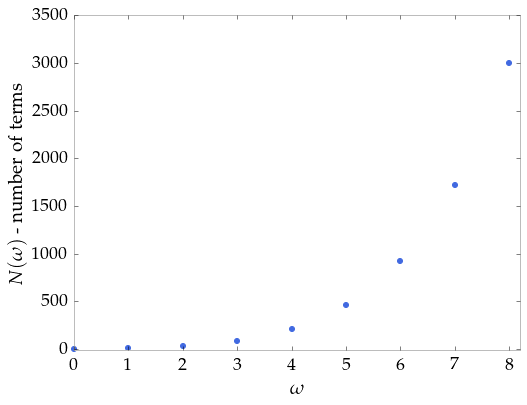

In [79]:
omega = np.array([range(9)])
nomega = scipy.special.binom(omega+6,6)

figure(figsize=(8, 6))
ax = plt.gca()
axline = ax.scatter(omega, nomega, color='royalblue', s=25)
axline.set_clip_on(False)
pyplot.xlabel(r"$\omega$")
pyplot.ylabel(r"$N(\omega)$ - number of terms")
pyplot.xlim([0,8.2])
pyplot.ylim([-10,3500])
pyplot.savefig('num-omega.pdf', bbox_inches='tight')
pyplot.show()

## Fano Resonance Cross Sections

In [80]:
def epsilon(E, ERes, GammaRes):
    return (E - ERes) / (GammaRes / 2)

def q(Xi):
    return -1 / np.tan(Xi)

def Etokau(E):
    return sqrt(E*4.0)

def Fano(E, ERes, GammaRes, L, Xi):
    return 4 * np.pi / Etokau(E)**2 * (2*L+1) * np.sin(Xi)**2 * (q(Xi) + epsilon(E,ERes,GammaRes))**2 / (1 + epsilon(E,ERes,GammaRes)**2)

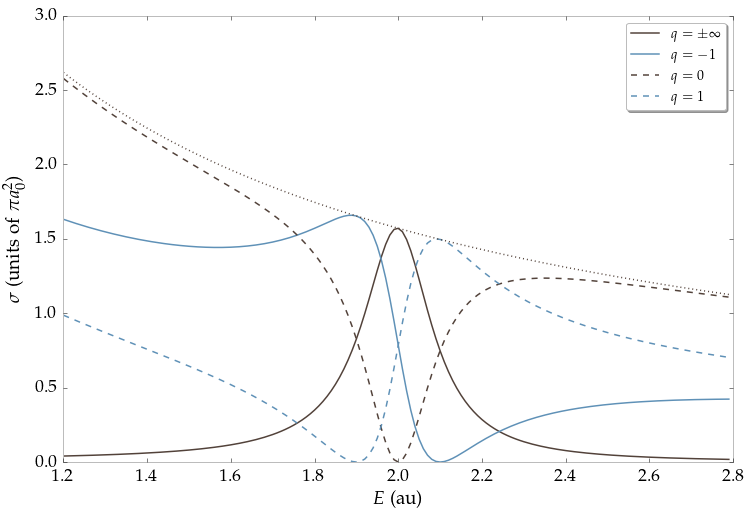

In [81]:
colors = ('#52423A', '#8dd3c7', '#5F91B7')
E = np.arange(1.2, 2.8, 0.01)
L = 0
cross0 = Fano(E, 2, 0.2, L, 1e-8)
cross1 = Fano(E, 2, 0.2, L, np.pi/4)
cross2 = Fano(E, 2, 0.2, L, np.pi/2)
cross3 = Fano(E, 2, 0.2, L, 3*np.pi/4)
pyplot.plot(E, cross0, ls='solid', label=r'$q=\pm\infty$', color=colors[0])
pyplot.plot(E, cross1, ls='solid', label=r'$q=-1$', color=colors[2])
pyplot.plot(E, cross2, ls='dashed', label=r'$q=0$', color=colors[0])
pyplot.plot(E, cross3, ls='dashed', label=r'$q=1$', color=colors[2])
pyplot.plot(E, (2*L+1)*np.pi*4/Etokau(E)**2, ls='dotted', color=colors[0])
pyplot.xlim([1.2, 2.8])
pyplot.xlabel(r"$E$ (au)")
pyplot.ylabel(r"$\sigma$ (units of $\pi a_0^2$)")
pyplot.legend()
pyplot.savefig('fano-cross.pdf', bbox_inches='tight')
pyplot.show()

## Cusp

In [82]:
data = numpy.loadtxt('Cusp.csv', dtype=float, delimiter=',')
x = np.transpose(data)[0]
y = np.transpose(data)[1]

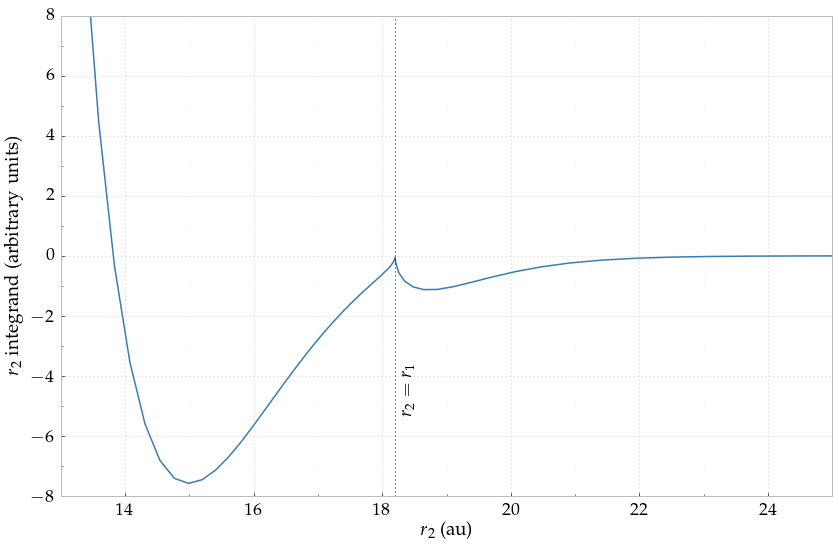

In [83]:
pyplot.plot(x, y*1e6, color=singletcolor)
pyplot.xlim([13,25])
pyplot.ylim([-8, 8])
pyplot.axvline(x=18.201, color='black', ls='dotted', lw=1)
pyplot.xlabel(r"$r_2$ (au)")
pyplot.ylabel(r"$r_2$ integrand (arbitrary units)")
ax = plt.gca()
ax.text(18.3, -4, r"$r_2 = r_1$", rotation=90, fontsize=18)
FixPlot(plt)
plt.tight_layout()
pyplot.savefig("cusp.pdf", bbox_inches='tight')
pyplot.show()

## Extra Exponential $\lambda$

In [84]:
lambdadata = np.genfromtxt("Lambda.txt")
lambdadata[:,1] = (lambdadata[:,1]+lambdadata[:,2])/100
lambdadata = np.delete(lambdadata, 2, 1)

lambda0 = lambdadata[0:50]
lambda10 = lambdadata[50:100]
lambda15 = lambdadata[100:150]
lambda20 = lambdadata[150:200]

# Version with just blues
colors = ('#52423A', '#8dd3c7', '#5F91B7')
terms = np.array(range(1400,1600))
pyplot.plot(lambda0[:,0], lambda0[:,1]/1.3, '+', lw=1.5, markersize=8, mew=2, label=r'$\lambda = 0.0$', ls='solid', color=colors[0])
pyplot.plot(lambda10[:,0], lambda10[:,1], 's', lw=1.5, markersize=5, mew=1, label=r'$\lambda = 1.0$', ls='solid', color=colors[2])
pyplot.plot(lambda15[:,0], lambda15[:,1], 'o', lw=1.5, markersize=5, mew=1, label=r'$\lambda = 1.5$', ls='dashed', color=colors[0])
pyplot.plot(lambda20[:,0], lambda20[:,1]/1.2, 'x', lw=1.5, markersize=8, mew=2, label=r'$\lambda = 2.0$', ls='dashed', color=colors[2])
pyplot.xlabel(r"$r_1$ (au)")
pyplot.ylabel(r"$(\bar{\phi}_6 \mathcal{L} \bar{C}_0)$ term (magnitude unimportant)")
pyplot.xlim([0, 18])
pyplot.ylim([-5, 43])
pyplot.legend()
FixPlot(plt)
pyplot.savefig('lambda.pdf', bbox_inches='tight')
pyplot.show()

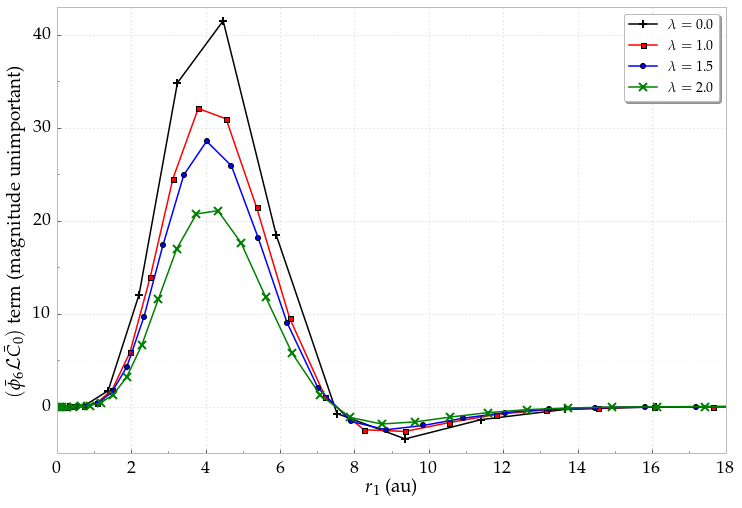

In [85]:
colors = ('#52423A', '#8dd3c7', '#5F91B7')
terms = np.array(range(1400,1600))
pyplot.plot(lambda0[:,0], lambda0[:,1]/1.3, 'k+', lw=1.5, markersize=8, mew=2, label=r'$\lambda = 0.0$', ls='solid')#, color=colors[0])
pyplot.plot(lambda10[:,0], lambda10[:,1], 'rs', lw=1.5, markersize=5, mew=1, label=r'$\lambda = 1.0$', ls='solid')#, color=colors[0])
pyplot.plot(lambda15[:,0], lambda15[:,1], 'bo', lw=1.5, markersize=5, mew=1, label=r'$\lambda = 1.5$', ls='solid')#, color=colors[0])
pyplot.plot(lambda20[:,0], lambda20[:,1]/1.2, 'gx', lw=1.5, markersize=8, mew=2, label=r'$\lambda = 2.0$', ls='solid')#, color=colors[0])
pyplot.xlabel(r"$r_1$ (au)")
pyplot.ylabel(r"$(\bar{\phi}_6 \mathcal{L} \bar{C}_0)$ term (magnitude unimportant)")
pyplot.xlim([0, 18])
pyplot.ylim([-5, 43])
pyplot.legend()
FixPlot(plt)
pyplot.savefig('lambda.pdf', bbox_inches='tight')
pyplot.show()

## D-Wave Nonlinear Parameter Optimization

#### Singlet $\kappa$ = 0.1

In [86]:
alpha = [0.2, 0.25, 0.3, 0.359, 0.4, 0.5, 0.6, 0.7, 0.8]
delta = [1.0110e-04, 1.0664e-04, 1.0835e-04, 1.0765e-04, 1.0621e-04, 1.0122e-04, 9.5598e-05, 9.0090e-05, 8.4901e-05]
cr = [1.030, 0.949, 0.905, 0.877, 0.868, 0.860, 0.857, 0.854, 0.855]

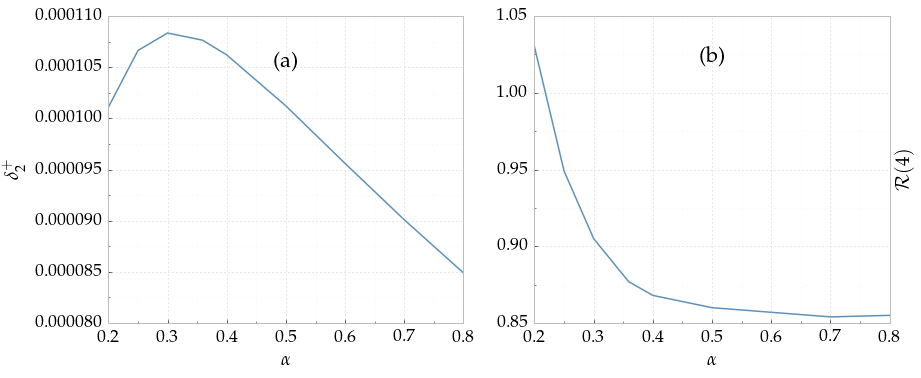

In [87]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
fig = pyplot.figure(figsize=(14, 5.5))

# Alpha phase variation
pyplot.subplot(1, 2, 1)
pyplot.plot(alpha, delta, color=colors[2])
pyplot.xlabel(r"$\alpha$")
pyplot.ylabel(r"$\delta_2^+$")
ax = plt.gca()
ax.text(0.48, 0.000105, '(a)', fontsize=22)
FixPlot(plt)

# Alpha convergence ratio
pyplot.subplot(1, 2, 2)
pyplot.plot(alpha, cr, color=colors[2])
pyplot.xlabel(r"$\alpha$")
pyplot.ylabel(r"$\mathcal{R}(4)$")
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(0.48, 1.02, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig('dwave-singlet-alpha-k01-variation.pdf', bbox_inches='tight')
pyplot.show()

In [88]:
beta = [0.2, 0.3, 0.368, 0.4, 0.5, 0.6, 0.7, 0.8]
delta = [1.0285E-04, 1.0895E-04, 1.0765E-04, 1.0640E-04, 1.0145E-04, 9.6620E-05, 1.6527E-04, -2.0694E-03]
cr = [1.042, 0.914, 0.877, 0.865, 0.841, 0.874, 5.2131, -128.261]

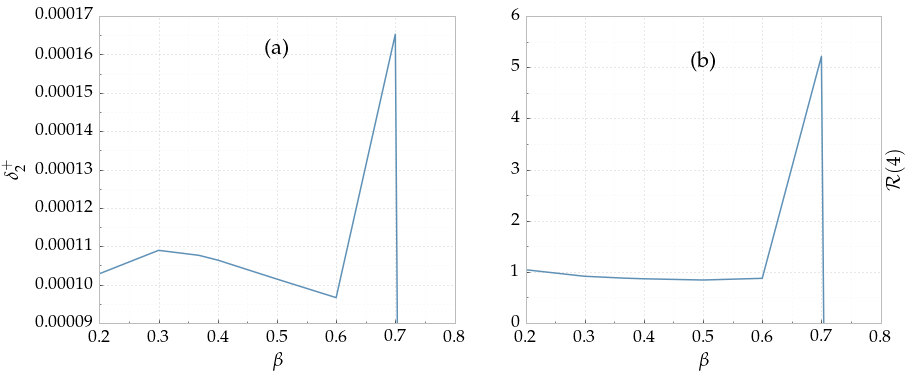

In [89]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
fig = pyplot.figure(figsize=(14, 5.5))

# Alpha phase variation
pyplot.subplot(1, 2, 1)
pyplot.plot(beta, delta, color=colors[2])
pyplot.xlabel(r"$\beta$")
pyplot.ylabel(r"$\delta_2^+$")
pyplot.ylim([0.00009, 0.00017])
ax = plt.gca()
ax.text(0.48, 0.00016, '(a)', fontsize=22)
FixPlot(plt)

# Alpha convergence ratio
pyplot.subplot(1, 2, 2)
pyplot.plot(beta, cr, color=colors[2])
pyplot.xlabel(r"$\beta$")
pyplot.ylabel(r"$\mathcal{R}(4)$")
pyplot.ylim([0, 6])
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(0.48, 5, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig('dwave-singlet-beta-k01-variation.pdf', bbox_inches='tight')
pyplot.show()

#### Singlet $\kappa$ = 0.6

In [90]:
alpha = [0.2, 0.25, 0.3, 0.359, 0.4, 0.5, 0.6, 0.7, 0.8]
delta = [1.6154e-01, 1.7647e-01, 1.8475e-01, 1.9076e-01, 1.9360e-01, 1.9773e-01, 1.9940e-01, 1.9976e-01, 1.9935e-01]
cr = [0.896, 0.762, 0.719, 0.697, 0.678, 0.620, 0.575, 0.500, 0.413]

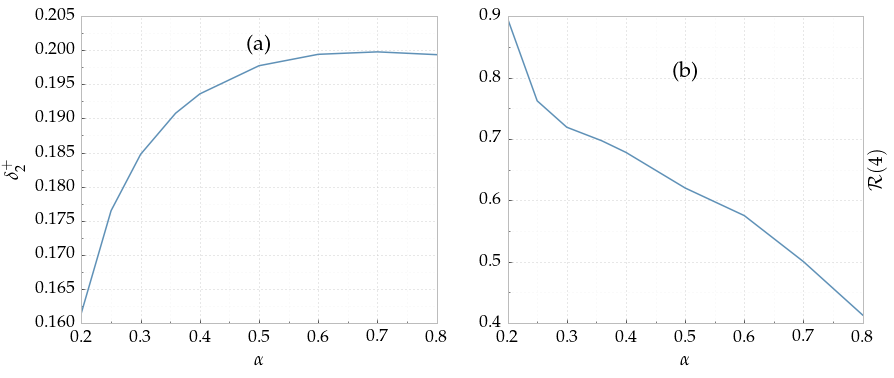

In [91]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
fig = pyplot.figure(figsize=(14, 5.5))

# Alpha phase variation
pyplot.subplot(1, 2, 1)
pyplot.plot(alpha, delta, color=colors[2])
pyplot.xlabel(r"$\alpha$")
pyplot.ylabel(r"$\delta_2^+$")
pyplot.ylim([0.160, 0.205])
ax = plt.gca()
ax.text(0.48, 0.2, '(a)', fontsize=22)
FixPlot(plt)

# Alpha convergence ratio
pyplot.subplot(1, 2, 2)
pyplot.plot(alpha, cr, color=colors[2])
pyplot.xlabel(r"$\alpha$")
pyplot.ylabel(r"$\mathcal{R}(4)$")
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(0.48, 0.8, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig('dwave-singlet-alpha-k06-variation.pdf', bbox_inches='tight')
pyplot.show()

In [92]:
beta = [0.2, 0.3, 0.368, 0.4, 0.5, 0.6, 0.7, 0.8]
delta = [1.6970E-01, 1.8564E-01, 1.9076E-01, 1.9239E-01, 1.9557E-01, 1.9699E-01, 2.1067E-01, 1.1528E+00]
cr = [0.930, 0.740, 0.697, 0.682, 0.643, 0.614, 1.300, 48.316]

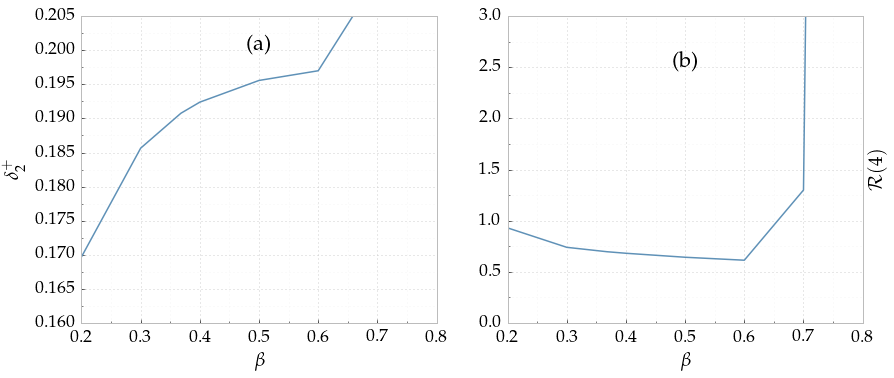

In [93]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
fig = pyplot.figure(figsize=(14, 5.5))

# Alpha phase variation
pyplot.subplot(1, 2, 1)
pyplot.plot(beta, delta, color=colors[2])
pyplot.xlabel(r"$\beta$")
pyplot.ylabel(r"$\delta_2^+$")
pyplot.ylim([0.160, 0.205])
ax = plt.gca()
ax.text(0.48, 0.2, '(a)', fontsize=22)
FixPlot(plt)

# Alpha convergence ratio
pyplot.subplot(1, 2, 2)
pyplot.plot(beta, cr, color=colors[2])
pyplot.xlabel(r"$\beta$")
pyplot.ylabel(r"$\mathcal{R}(4)$")
pyplot.ylim([0, 3])
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(0.48, 2.5, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig('dwave-singlet-beta-k06-variation.pdf', bbox_inches='tight')
pyplot.show()

In [94]:
beta = [0.368, 0.4, 0.5, 0.6, 0.7]
delta = [1.9940e-01, 2.0065e-01, 2.0295e-01, 2.0422e-01, 2.5568e-01]
cr = [0.575, 0.545, 0.483, 0.455, 3.545]

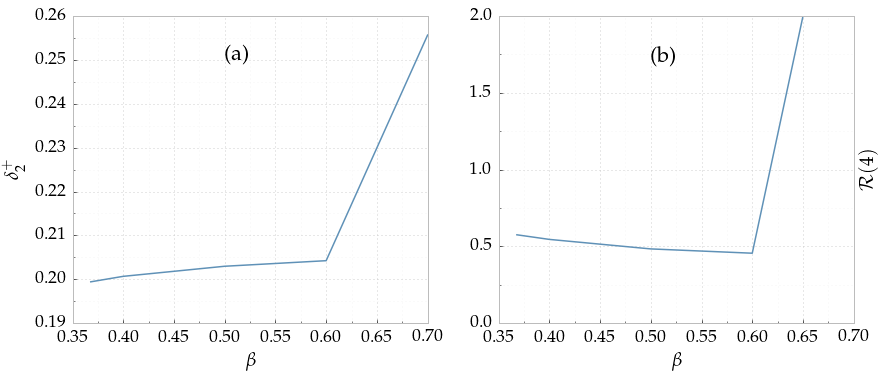

In [95]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
fig = pyplot.figure(figsize=(14, 5.5))

# Alpha phase variation
pyplot.subplot(1, 2, 1)
pyplot.plot(beta, delta, color=colors[2])
pyplot.xlabel(r"$\beta$")
pyplot.ylabel(r"$\delta_2^+$")
#pyplot.ylim([0.160, 0.205])
ax = plt.gca()
ax.text(0.5, 0.25, '(a)', fontsize=22)
FixPlot(plt)

# Alpha convergence ratio
pyplot.subplot(1, 2, 2)
pyplot.plot(beta, cr, color=colors[2])
pyplot.xlabel(r"$\beta$")
pyplot.ylabel(r"$\mathcal{R}(4)$")
pyplot.ylim([0, 2])
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(0.5, 1.7, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig('dwave-singlet-alphabeta-k06-variation.pdf', bbox_inches='tight')
pyplot.show()

#### Triplet $\kappa$ = 0.1

In [96]:
alpha = [0.2, 0.3, 0.365, 0.4]
delta = [2.6630e-05, 3.1848e-05, 3.0873e-05, 2.9176e-05]
cr = [1.091, 0.939, 0.895, 0.874]

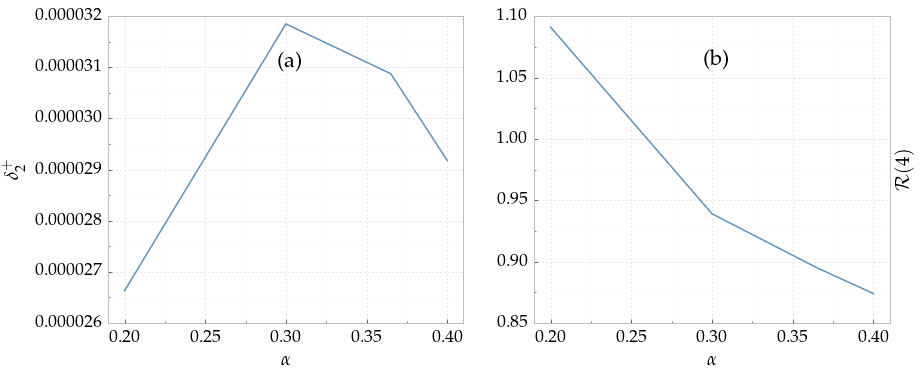

In [97]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
fig = pyplot.figure(figsize=(14, 5.5))

# Alpha phase variation
pyplot.subplot(1, 2, 1)
pyplot.plot(alpha, delta, markersize=10, color=colors[2])
pyplot.xlabel(r"$\alpha$")
pyplot.ylabel(r"$\delta_2^+$")
pyplot.xlim([0.19, 0.41])
ax = plt.gca()
ax.text(0.295, 0.000031, '(a)', fontsize=22)
FixPlot(plt)

# Alpha convergence ratio
pyplot.subplot(1, 2, 2)
pyplot.plot(alpha, cr, markersize=10, color=colors[2])
pyplot.xlabel(r"$\alpha$")
pyplot.ylabel(r"$\mathcal{R}(4)$")
pyplot.xlim([0.19, 0.41])
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(0.295, 1.06, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig('dwave-triplet-alpha-k01-variation.pdf', bbox_inches='tight')
pyplot.show()

#### Triplet $\kappa$ = 0.6

In [98]:
alpha = [0.2, 0.3, 0.365, 0.4, 0.5, 0.6, 0.7, 0.8]
delta = [-4.4260E-02, -3.4979E-02, -3.2204E-02, -3.0737E-02, -2.8987E-02, -2.8511E-02, -2.8613E-02, -2.9007E-02]
cr = [0.978, 0.787, 0.708, 0.646, 0.535, 0.474, 0.447, 0.446]

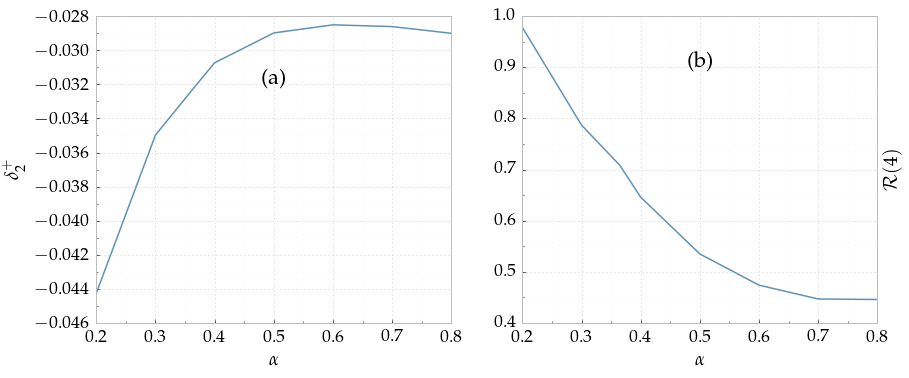

In [99]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
fig = pyplot.figure(figsize=(14, 5.5))

# Alpha phase variation
pyplot.subplot(1, 2, 1)
pyplot.plot(alpha, delta, color=colors[2])
pyplot.xlabel(r"$\alpha$")
pyplot.ylabel(r"$\delta_2^+$")
#pyplot.xlim([0.19, 0.41])
ax = plt.gca()
ax.text(0.48, -0.032, '(a)', fontsize=22)
FixPlot(plt)

# Alpha convergence ratio
pyplot.subplot(1, 2, 2)
pyplot.plot(alpha, cr, color=colors[2])
pyplot.xlabel(r"$\alpha$")
pyplot.ylabel(r"$\mathcal{R}(4)$")
#pyplot.xlim([0.19, 0.41])
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(0.48, 0.9, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig('dwave-triplet-alpha-k06-variation.pdf', bbox_inches='tight')
pyplot.show()

In [100]:
beta = [0.368, 0.4, 0.5, 0.6, 0.7]
delta = [-2.8511e-02, -2.7863e-02, -2.6690e-02, 3.3091e-03, -1.3722e+00]
cr = [0.474, 0.438, 0.387, 3.208, -95.493]

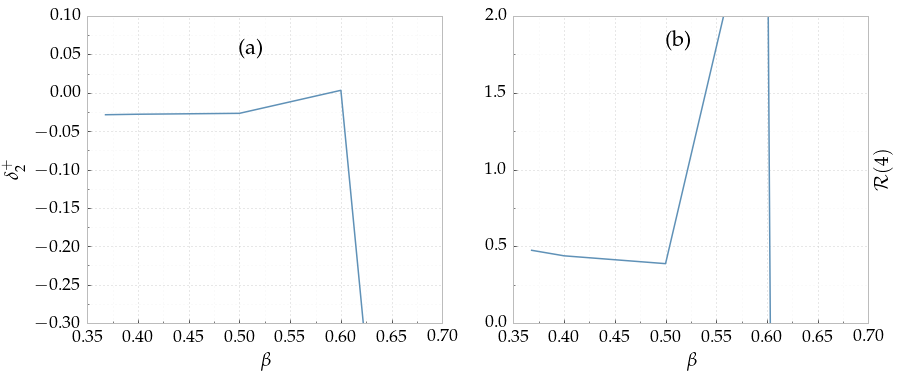

In [101]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
fig = pyplot.figure(figsize=(14, 5.5))

# Alpha phase variation
pyplot.subplot(1, 2, 1)
pyplot.plot(beta, delta, color=colors[2])
pyplot.xlabel(r"$\beta$")
pyplot.ylabel(r"$\delta_2^+$")
pyplot.ylim([-0.3, 0.1])
ax = plt.gca()
ax.text(0.5, 0.05, '(a)', fontsize=22)
FixPlot(plt)

# Alpha convergence ratio
pyplot.subplot(1, 2, 2)
pyplot.plot(beta, cr, color=colors[2])
pyplot.xlabel(r"$\beta$")
pyplot.ylabel(r"$\mathcal{R}(4)$")
pyplot.ylim([0, 2])
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(0.5, 1.8, '(b)', fontsize=22)
FixPlot(plt)

pyplot.savefig('dwave-triplet-alphabeta-k06-variation.pdf', bbox_inches='tight')
pyplot.show()

## Singlet/Triplet Phase Shift Comparisons

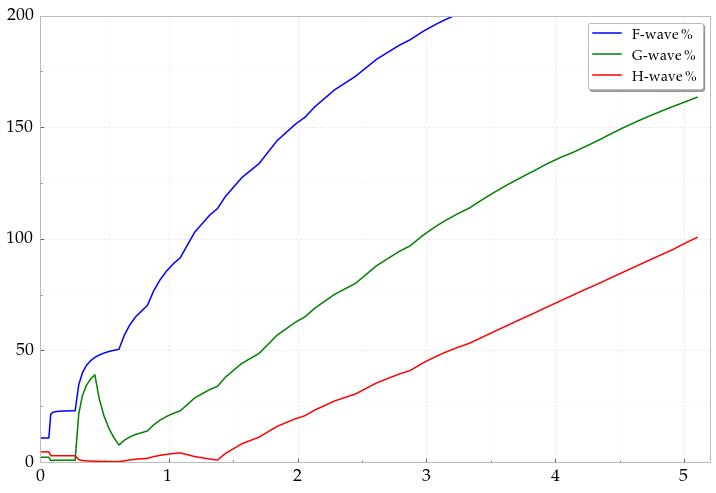

In [102]:
#pyplot.plot(df['E'], PercentDiff(df['Phase1S'], df['Phase3S']).values, label=r'S-wave \%')
#pyplot.plot(df['E'], PercentDiff(df['Phase1P'], df['Phase3P']).values, label=r'P-wave \%')
#pyplot.plot(df['E'], PercentDiff(df['Phase1D'], df['Phase3D']).values, label=r'D-wave \%')
pyplot.plot(df['E'], PercentDiff(df['Phase1F'], df['Phase3F']).values, label=r'F-wave \%')
pyplot.plot(df['E'], PercentDiff(df['Phase1G'], df['Phase3G']).values, label=r'G-wave \%')
pyplot.plot(df['E'], PercentDiff(df['Phase1H'], df['Phase3H']).values, label=r'H-wave \%')
pyplot.xlim([0, 5.2])
pyplot.ylim([0, 200])
pyplot.legend()
FixPlot(plt)
pyplot.savefig('singlet-triplet-compare.pdf', bbox_inches='tight')
pyplot.show()

## Cleanup

In [103]:
db.close()

In [104]:
EndTime = datetime.datetime.now()
TimeDiff = EndTime - StartTime
print "Seconds: ", TimeDiff.seconds
print "Minutes: ", TimeDiff.seconds / 60.

Seconds:  323
Minutes:  5.38333333333
